In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])
Amino_acid_dict = {'Ala': 'A',
                   'Arg': 'R',
                   'Asn': 'N',
                   'Asp': 'D',
                   'Cys': 'C',
                   'Gln': 'Q',
                   'Glu': 'E',
                   'Gly': 'G',
                   'His': 'H',
                   'Ile': 'I',
                   'Leu': 'L',
                   'Lys': 'K',
                   'Met': 'M',
                   'Phe': 'F',
                   'Pro': 'P',
                   'Ser': 'S',
                   'Thr': 'T',
                   'Trp': 'W',
                   'Tyr': 'Y',
                   'Val': 'V',
                   'Ter': '*'
                  }

In [714]:
df_combined

,site,amino_acid,rep_1_en,rep_2_en,rep_1,rep_2
0,84,*,-7.696455,-9.819601,0.046662,-0.108413
1,84,A,-10.762174,-11.939703,-0.064793,-0.081515
2,84,C,-10.502571,-5.649198,-0.058211,-0.039306
3,84,D,-9.524369,-10.042025,-0.056967,-0.053417
4,84,E,-8.511037,-11.617805,-0.069673,-0.067266
...,...,...,...,...,...,...
58,86,S,-9.860982,-7.843010,-0.018276,-0.100628
59,86,T,-9.807610,-10.789715,-0.071588,-0.065230
60,86,V,-10.009534,-5.416431,-0.141779,-0.128144
61,86,W,-10.723047,-9.110762,-0.033265,-0.033128


In [723]:
temp = df_combined[df_combined['site']==84].copy()
temp

,site,amino_acid,rep_1_en,rep_2_en,rep_1,rep_2
0,84,*,-7.696455,-9.819601,0.046662,-0.108413
1,84,A,-10.762174,-11.939703,-0.064793,-0.081515
2,84,C,-10.502571,-5.649198,-0.058211,-0.039306
3,84,D,-9.524369,-10.042025,-0.056967,-0.053417
4,84,E,-8.511037,-11.617805,-0.069673,-0.067266
5,84,F,-10.587377,-9.450944,-0.060461,-0.049995
6,84,G,-4.184773,-4.071103,-0.075588,-0.030808
7,84,H,0.765495,-9.566447,0.096043,-0.105229
8,84,I,-9.481395,-10.407181,-0.114558,-0.115873
9,84,K,-5.352807,-4.254431,-0.068261,-0.107449


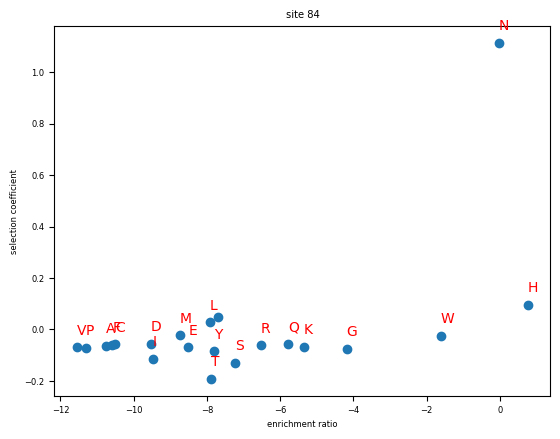

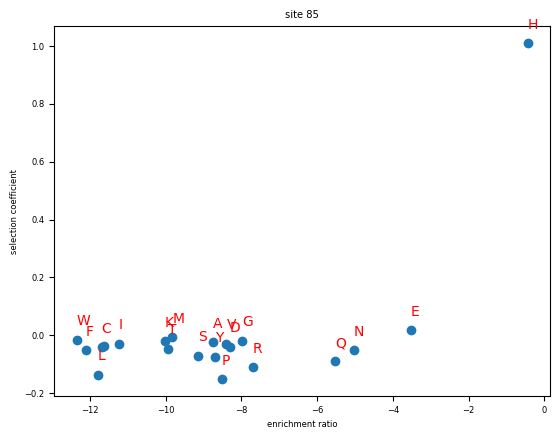

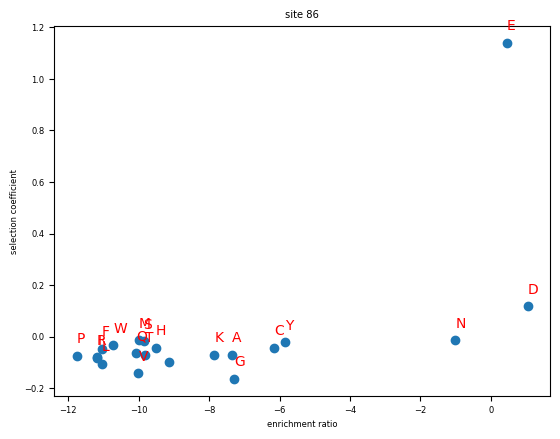

In [724]:
df_enrich   = pd.read_csv('./data/human_protein/DRB1/pref/enrichment.csv.gz')
df_enrich=df_enrich.dropna()
df_enrich=df_enrich[['Affected codon','Substituted AA','Day 11 log2 enrichment score (replicate 1)','Day 11 log2 enrichment score (replicate 2)']]

SELECTION_FILE = FIG2_HUMAN_DIR + 'DRB1/selection_coefficients/selection_1.csv'
data = pd.read_csv(SELECTION_FILE)
data = data[data['site']<=86]
df_enrich=df_enrich.rename(columns={'Affected codon':'site','Substituted AA':'amino_acid', 'Day 11 log2 enrichment score (replicate 1)':'rep_1_en','Day 11 log2 enrichment score (replicate 2)':'rep_2_en'})
df_enrich['site']=[int(i) for i in df_enrich['site']]
df_enrich = df_enrich[df_enrich['site']<=86]
data
df_enrich=df_enrich.groupby(['site','amino_acid'])[['rep_1_en','rep_2_en']].median()
df_enrich=df_enrich.reset_index()
df_enrich

df_enrich=df_enrich.rename(columns={'Affected codon':'site','Substituted AA':'amino_acid', 'Day 11 log2 enrichment score (replicate 1)':'rep_1','Day 11 log2 enrichment score (replicate 2)':'rep_2'})


df_combined = pd.merge(df_enrich, data, how="left",on=['site','amino_acid'])
plt.scatter(df_combined[df_combined['site']==84]['rep_1_en'], df_combined[df_combined['site']==84]['rep_1'])
temp = df_combined[df_combined['site']==84].copy()
for i,j,k in zip(AA[1:],temp.iloc[1:]['rep_1_en'], temp.iloc[1:]['rep_1']):
    plt.annotate(i,(j,k+0.05),color='red',size=10)
plt.ylabel('selection coefficient')
plt.xlabel('enrichment ratio')
plt.title('site 84')



plt.show()
temp = df_combined[df_combined['site']==85].copy()
for i,j,k in zip(AA[1:],temp.iloc[1:]['rep_1_en'], temp.iloc[1:]['rep_1']):
    plt.annotate(i,(j,k+0.05),color='red',size=10)

plt.scatter(df_combined[df_combined['site']==85]['rep_1_en'], df_combined[df_combined['site']==85]['rep_1'])
plt.ylabel('selection coefficient')
plt.xlabel('enrichment ratio')
plt.title('site 85')
plt.show()
temp = df_combined[df_combined['site']==86].copy()
for i,j,k in zip(AA[1:],temp.iloc[1:]['rep_1_en'], temp.iloc[1:]['rep_1']):
    plt.annotate(i,(j,k+0.05),color='red',size=10)

plt.scatter(df_combined[df_combined['site']==86]['rep_1_en'], df_combined[df_combined['site']==86]['rep_1'])
plt.ylabel('selection coefficient')
plt.xlabel('enrichment ratio')
plt.title('site 86')
plt.show()



In [711]:
df_count['generation'].unique()
df_count.sort_values('counts').iloc[-40:]

,replicate,generation,site,AA,counts,frequency
567,1,5,86,*,39617,0.013273
559,1,5,85,P,39884,0.013362
1633,1,11,86,S,40491,0.009019
60,1,0,86,V,41482,0.014057
535,1,5,84,L,42614,0.014277
583,1,5,86,S,43640,0.014621
34,1,0,85,P,44123,0.014952
10,1,0,84,L,44208,0.014981
1093,1,8,86,A,45659,0.010050
556,1,5,85,L,47295,0.015845


In [707]:
df_count
df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]

,site,AA,counts,frequency
54,86,N,12116,0.004106


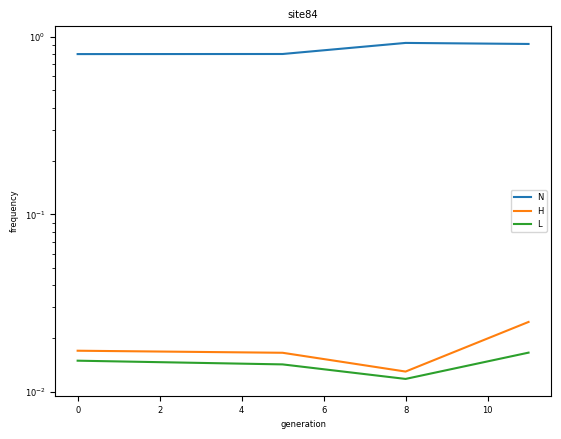

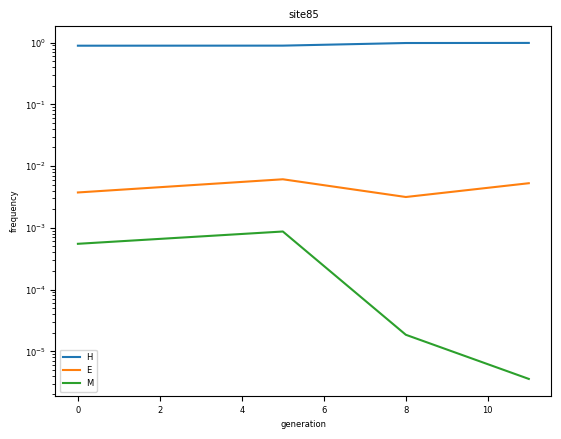

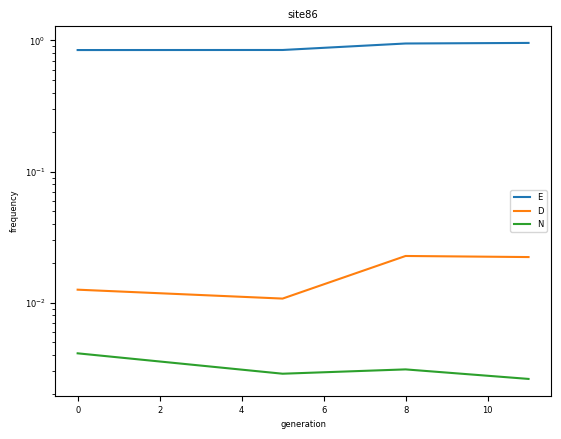

In [728]:


df_count = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/DRB1/allele_counts/single_allele_counts_rep1.csv')
df_count['AA'] = [codon2aa(i) for i in df_count['codon']]
df_count = df_count.drop('codon',axis=1)
df_count=df_count.groupby(['replicate','generation','site','AA'])['counts'].apply(lambda x : x.astype(int).sum())
df_count = df_count.reset_index()
df_count = df_count[df_count['site']<=86]

freq_list0 = []

for site in range(84,87):
#     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    freq_list0+= (df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts'].sum()).tolist()

for site in range(84,87):
    freq_list0+= (df_count[(df_count['generation']==5)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==5)&(df_count['site']==site)]['counts'].sum()).tolist()
for site in range(84,87):
#     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    freq_list0+= (df_count[(df_count['generation']==8)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==8)&(df_count['site']==site)]['counts'].sum()).tolist()

for site in range(84,87):
#     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    freq_list0+= (df_count[(df_count['generation']==11)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==11)&(df_count['site']==site)]['counts'].sum()).tolist()


df_count['frequency'] = freq_list0
df_count_0 = df_count[df_count['generation']==0].drop(['replicate','generation'],axis=1)
df_count_1 = df_count[df_count['generation']==5].drop(['replicate','generation'],axis=1)
df_count_2 = df_count[df_count['generation']==8].drop(['replicate','generation'],axis=1)
df_count_3 = df_count[df_count['generation']==11].drop(['replicate','generation'],axis=1)
site=84
AA_list = ['N','H','L']

for aa in AA_list:
    plt.plot([0,5,8,11], 
             [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], 
              df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency'],
              df_count_2.loc[(df_count_2['site']==site)&(df_count_2['AA']==aa)]['frequency'],
              df_count_3.loc[(df_count_3['site']==site)&(df_count_3['AA']==aa)]['frequency']], label=aa)
plt.legend()
plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.title('site84')
plt.show()

site=85
AA_list = ['H','E','M']

for aa in AA_list:
    plt.plot([0,5,8,11], 
             [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], 
              df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency'],
              df_count_2.loc[(df_count_2['site']==site)&(df_count_2['AA']==aa)]['frequency'],
              df_count_3.loc[(df_count_3['site']==site)&(df_count_3['AA']==aa)]['frequency']], label=aa)
plt.legend()
plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.title('site85')
plt.show()

site=86
AA_list = ['E','D','N']

for aa in AA_list:
    plt.plot([0,5,8,11], 
             [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], 
              df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency'],
              df_count_2.loc[(df_count_2['site']==site)&(df_count_2['AA']==aa)]['frequency'],
              df_count_3.loc[(df_count_3['site']==site)&(df_count_3['AA']==aa)]['frequency']], label=aa)
plt.legend()
plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.title('site86')
plt.show()


# df_count = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/DRB1/allele_counts/single_allele_counts_rep2.csv')
# df_count['AA'] = [codon2aa(i) for i in df_count['codon']]
# df_count = df_count.drop('codon',axis=1)
# df_count=df_count.groupby(['replicate','generation','site','AA'])['counts'].apply(lambda x : x.astype(int).sum())
# df_count = df_count.reset_index()

# freq_list0 = []
# freq_list1 = []
# for site in range(84,87):
# #     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
#     freq_list0+= (df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts'].sum()).tolist()

# for site in range(84,87):
#     freq_list1+= (df_count[(df_count['generation']==5)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==5)&(df_count['site']==site)]['counts'].sum()).tolist()

# df_count['frequency'] = freq_list0+freq_list1
# df_count_0 = df_count[df_count['generation']==0].drop(['replicate','generation'],axis=1)
# df_count_1 = df_count[df_count['generation']==5].drop(['replicate','generation'],axis=1)


# for aa in AA_list:
#     plt.plot([0,1], [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency']], label=aa)
# plt.legend()
# plt.yscale('log')
# plt.xlabel('generation')
# plt.ylabel('frequency')
# plt.title('site13')
# plt.show()



In [2]:
from mpl_toolkits.axisartist.axislines import Subplot

FIG2_HUMAN_DIR      = './outputs/human_protein/'
SELECTION_FILE = FIG2_HUMAN_DIR + 'YAP1/selection_coefficients/YAP1_-4.csv.gz'
data = pd.read_csv(SELECTION_FILE)
site_list = data['site'].unique().tolist()
rep_list  = data.columns[2:]
rep=rep_list[0]
MPL_scale  = 8
PREF_scale = 2
df_enrich   = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
df_enrich['hgvs_pro'].astype(str)
df_enrich   = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
df_enrich   = df_enrich[ df_enrich['hgvs_pro'].str.contains('p.')]
mutant_list = df_enrich['hgvs_pro'].tolist()
pref_list   = df_enrich['score_101208'].tolist()
AA_dict     = {}
for aa in AA:
    if aa != '*':
        AA_dict[aa] = [0] * 34
site_lll = set()
for i in range(len(mutant_list)):
    if mutant_list[i][-1] != '?':
        mutants = mutant_list[i][-3:]
        site_lll.add(int(mutant_list[i][5: -3]))
        short_AA = Amino_acid_dict[mutants]
        if short_AA != '*':
            if mutant_list[i][5:-3] != '':
                site = int(mutant_list[i][5: -3]) - 1
            AA_dict[short_AA][site] = pref_list[i]

df_AA = pd.DataFrame(columns = ['site', 'amino_acid', 'pref'])
site_list = []
amino_acid_list = []
pref_list = []
for aa, pref in AA_dict.items():
    for i in range(len(pref)):
        site_list.append(i + 2)
        pref_list.append(pref[i])
        amino_acid_list.append(aa)
df_AA['site'] = site_list
df_AA['amino_acid'] = amino_acid_list
df_AA['pref'] = pref_list
data2 = pd.pivot_table(df_AA, values = 'pref', index = ['site'], columns = ['amino_acid']).reset_index()
data2['site'] = [str(i) + '_Pref' for i in data2['site'].tolist()]

data = pd.read_csv(SELECTION_FILE)
site_list = data['site'].unique().tolist()
rep_list = data.columns[2:]

sites_per_line = 35
exp_scale = 10
plt.figure()
data1 = data[['site', 'amino_acid', 'rep_1']]

data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
data1 = data1.drop(['*'], axis = 1)
data1['site'] = [str(i) + '_MPL' for i in data1['site'].tolist()]


df_all  = data1[0: 0].copy()
df_zero = data1[0: 1].copy()
for col in df_zero.columns:
    df_zero[col].values[:] = 0
selected_rows = [10, 16, 27, 
                 4,  13, 28,
                 29, 30, 20]
k = 10 * len(selected_rows)
m = 0
for i in selected_rows:
    #MPL
    if m%3 == 0:
        df_all = df_all.append(df_zero)
    m += 1
    df_all    = df_all.append(df_zero)
    df_temp   = data1[data1['site'] == str(i) + '_MPL'].copy()
    temp_pure = df_temp[df_temp.columns[1:]]

    temp_pure = np.exp(MPL_scale * temp_pure)
    temp_pure.replace(1, 0, inplace = True)
    temp_pure = temp_pure.div(temp_pure.sum(axis = 1), axis = 0)
    df_all = df_all.append(temp_pure)

    #PREF
    df_temp   = data2[data2['site'] == str(i) + '_Pref'].copy()
    temp_pure = df_temp[df_temp.columns[1:]]
    temp_pure = np.exp(PREF_scale * temp_pure)
    temp_pure.replace(1, 0, inplace = True)
    temp_pure = temp_pure.div(temp_pure.sum(axis = 1), axis = 0)
    df_all = df_all.append(temp_pure)

df_all['plot_site'] = [i for i in range(10)] + [i for i in range(10)] + [i for i in range(10)]
plot_index = df_all['site']
df_all = df_all.drop(['site'], axis = 1)

df_all.set_index('plot_site', inplace = True)
total_line_num = len(df_all.columns)
sites_per_line = int(df_all.shape[0]/3)
num_line = int(total_line_num/sites_per_line) + 1
df_all.iloc[15]

amino_acid
A    0.055582
C    0.000000
D    0.034118
E    0.062849
F    0.000000
G    0.051891
H    0.083863
I    0.028505
K    0.115315
L    0.081094
M    0.043483
N    0.035325
P    0.045822
Q    0.073256
R    0.088725
S    0.061380
T    0.054536
V    0.040849
W    0.000000
Y    0.043406
Name: 5, dtype: float64

<Figure size 432x288 with 0 Axes>

In [572]:
PREF_file = './data/human_protein/TpoR/TpoR_MPL/pref/enrichment.csv.gz'
df_enrich = pd.read_csv(PREF_file)
df_enrich[df_enrich['hgvs_pro'].str.contains('14Arg')]


,accession,hgvs_nt,hgvs_pro,score,SE,epsilon,SE_Replicate_A,SE_Replicate_B,SE_Replicate_C,SE_Replicate_D,SE_Replicate_E,SE_Replicate_F,score_Replicate_F,score_Replicate_A,score_Replicate_B,score_Replicate_C,score_Replicate_D,score_Replicate_E,score_Replicate_F.1
1269,urn:mavedb:00000043-a-1#1270,c.[41T>G;42A>T],p.Leu14Arg,-2.154352,0.444678,0.0,0.248728,0.087244,0.084401,0.113816,0.161091,0.218563,-3.314928,-3.319818,-0.666723,-1.218761,-1.987688,-2.513757,-3.314928
1270,urn:mavedb:00000043-a-1#1271,c.[41T>G;42A>G],p.Leu14Arg,-1.442179,0.524296,0.0,0.368053,0.158496,0.091008,0.095377,0.189809,0.067561,0.162463,-3.580208,-1.425320,-0.738751,-0.941802,-2.302601,0.162463
1271,urn:mavedb:00000043-a-1#1272,c.[41T>G;42A>C],p.Leu14Arg,-1.535239,0.631290,0.0,0.393420,0.125503,0.064851,0.045276,0.063138,0.078103,-1.419821,-4.553494,-1.816139,-0.937664,0.057942,-0.725688,-1.419821
1272,urn:mavedb:00000043-a-1#1273,c.41T>G,p.Leu14Arg,-1.091543,0.177921,0.0,0.080212,0.075886,0.104053,0.071040,0.077057,0.069859,-0.975155,-1.057172,-0.524937,-1.890059,-1.071187,-1.052038,-0.975155
1334,urn:mavedb:00000043-a-1#1335,c.[40C>A;41T>G;42A>G],p.Leu14Arg,-1.491337,0.440077,0.0,0.066061,0.121200,0.097186,0.126358,0.219760,0.168668,-2.408820,0.186357,-1.026051,-1.136304,-1.830773,-2.797186,-2.408820
1335,urn:mavedb:00000043-a-1#1336,c.[40C>A;41T>G],p.Leu14Arg,-1.155527,0.453087,0.0,0.068142,0.074912,0.058660,0.083276,0.112114,0.197497,-3.097042,-0.422337,-0.277104,-0.216389,-1.254090,-1.723262,-3.097042


In [639]:
def plott(rep1,rep2,m,AA_list,repp):
    SELECTION_FILE = FIG2_HUMAN_DIR + 'TpoR/TpoR_MPL/selection_coefficients/TpoR_MPL_-1.csv.gz'

    data = pd.read_csv(SELECTION_FILE)
    site_list = data['site'].unique().tolist()
    rep_list = data.columns[2:]

    sites_per_line = 35
    exp_scale = 10
    plt.figure()
    data1 = data[['site', 'amino_acid', 'rep_1']]

    data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
    data1 = data1.drop(['*'], axis = 1)
    data1['site'] = [str(i) + '_MPL' for i in data1['site'].tolist()]

    data1



    PREF_file = './data/human_protein/TpoR/TpoR_MPL/pref/enrichment.csv.gz'
    df_enrich = pd.read_csv(PREF_file)
    # pref['hgvs_pro'].tolist()


    df_enrich['hgvs_pro'].astype(str)
    df_enrich   = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
    df_enrich   = df_enrich[ df_enrich['hgvs_pro'].str.contains('p.')]
    mutant_list = df_enrich['hgvs_pro'].tolist()
    pref_list   = df_enrich['score_Replicate_B'].tolist()
    AA_dict     = {}
    for aa in AA:
        if aa != '*':
            AA_dict[aa] = [0] * 31
    site_lll = set()
    for i in range(len(mutant_list)):
        if mutant_list[i][-1] != '?':
            mutants = mutant_list[i][-3:]
            site_lll.add(int(mutant_list[i][5: -3]))
            short_AA = Amino_acid_dict[mutants]
            if short_AA != '*':
                if mutant_list[i][5:-3] != '':
                    site = int(mutant_list[i][5: -3]) - 1
                AA_dict[short_AA][site] = pref_list[i]

    df_AA = pd.DataFrame(columns = ['site', 'amino_acid', 'pref'])
    site_list = []
    amino_acid_list = []
    pref_list = []
    for aa, pref in AA_dict.items():
        for i in range(len(pref)):
            site_list.append(i + 2)
            pref_list.append(pref[i])
            amino_acid_list.append(aa)
    df_AA['site'] = site_list
    df_AA['amino_acid'] = amino_acid_list
    df_AA['pref'] = pref_list
    data2 = pd.pivot_table(df_AA, values = 'pref', index = ['site'], columns = ['amino_acid']).reset_index()
    data2['site'] = [str(i) + '_Pref' for i in data2['site'].tolist()]
    data2

    # rep1='Replicate_D_c_0'
    # rep2='Replicate_D_c_1'
    wt = 'TETAWISLVTALHLVLGLSAVLGLLLLRWQF'

    df_count = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/TpoR/TpoR_MPL/raw_data/nucleotide_count.csv')
    df_count['hgvs_pro'].astype(str)
    df_count   = df_count[~df_count['hgvs_pro'].str.contains('\[')]
    df_count = df_count[['hgvs_pro',rep1,rep2]]
    df_count = df_count.groupby(['hgvs_pro'])[rep1,rep2].apply(lambda x : x.astype(int).sum())
    df_count = df_count.reset_index()
    df_count
    mutant_list = df_count['hgvs_pro'].tolist()
    cnt0_list = df_count[rep1].tolist()
    cnt1_list = df_count[rep2].tolist()
    # cnt0_list_fixed = df_count['Replicate_A_c_0'].tolist()
    # cnt1_list_fixed = df_count['Replicate_A_c_1'].tolist()
    # print(cnt0_list)
    mut_list = []
    site_list = []
    wt_cnt0=cnt0_list[0]
    wt_cnt1=cnt1_list[0]
    cnt0_list=cnt0_list[1:]
    cnt1_list=cnt1_list[1:]
    # print(cnt0_list)
    for i in range(len(mutant_list)):
    # #     print(mutant_list[i][-3:])

        if mutant_list[i][-1] != '?' and mutant_list[i][-3]!='_':
    # #         if int(mutant_list[i][5: -3])==14:
    # #             print(Amino_acid_dict[mutants],)

            mutants = mutant_list[i][-3:]
            site_list.append(int(mutant_list[i][5: -3]))
            mut_list.append(Amino_acid_dict[mutants])

    #         for j in range(1,len(wt)+1):
    # #             print(cnt0_list)
    #             if j != int(mutant_list[i][5: -3]):
    #                 site_list.append(j)
    #                 mut_list.append(wt[j-1])
    #                 cnt0_list.append(cnt0_list_fixed[i])
    #                 cnt1_list.append(cnt1_list_fixed[i])        


    #     if mutant_list[i][-3]=='_':
    # #         site_list.append(100)
    # #         mut_list.append(' ')
    #         for j in range(len(wt)):
    # # #             print(cnt0_list)
    #             site_list.append(j+1)
    #             mut_list.append(wt[j])
    #             cnt0_list.insert(0,wt_cnt0)
    #             cnt1_list.insert(0,wt_cnt1)
    # #         print(cnt0_list)
    #         cnt0_list=cnt0_list[1:]
    #         cnt1_list=cnt1_list[1:]




    df_freq = pd.DataFrame(columns = ['site', 'amino_acid', 'count0','count1'])
    df_freq['site']=site_list
    df_freq['amino_acid']=mut_list
    df_freq['count0']=cnt0_list
    df_freq['count1']=cnt1_list
    df_freq=df_freq.groupby(['site', 'amino_acid'])["count0", "count1"].apply(lambda x : x.astype(int).sum())
    df_freq = df_freq.reset_index()
    # df_freq
    # df_freq['freq0'] = 0
    # df_freq['freq1'] = 0

    # df_freq[(df_freq['amino_acid']=='F')&(df_freq['site']==14)]
    df_freq['freq0'] = df_freq['count0']/1645087   
    df_freq['freq1'] = df_freq['count1']/820141   

    for i in range(1,32):
        residual0 = df_freq[df_freq['site']==i]['freq0'].sum()
        residual1 = df_freq[df_freq['site']==i]['freq1'].sum()
        df_temp={'site':i,'amino_acid':wt[i-1],'freq0':1-residual0,'freq1':1-residual1}
        df_freq=df_freq.append(df_temp,ignore_index=True)

    df_freq['pref'] = df_freq['freq1']/df_freq['freq0']



    # total_cnt=[]
    # freq_list0 = []
    # freq_list1 = []
    # for i in range(1,32):
    # #     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    #     freq_list0+= (df_freq.loc[df_freq['site']==i]['count0']/1645087   
    #     freq_list1+= (df_freq.loc[df_freq['site']==i]['count1']/820141
    # #     total_cnt.append(df_freq[df_freq['site']==i]['count0'].sum())
    # df_freq['freq0']=freq_list0
    # df_freq['freq1']=freq_list1
    # df_freq['pref'] = df_freq['freq1']/df_freq['freq0']
    # df_freq

    for i in range(31):
        for aa in df_freq[df_freq['site']==i+1]['amino_acid']:
            if aa!='*':
                data2.at[i,aa]= df_freq[(df_freq['site']==i+1) &(df_freq['amino_acid']==aa)]['pref']
    data2

    # plt.scatter(x=data1['A'],y=data2['A'])
    # site = 18

    # for x,y,z in zip(AA[1:],data1.T[site].iloc[1:], data2.T[site].iloc[1:]):  
    #     plt.annotate(x,(y-0.0002,z-0.0005),c='red',size=10)

    # plt.scatter(x=data1.T[site].iloc[1:],y=data2.T[site].iloc[1:])
    # plt.show()

    # AA_list = ['S','K','N']
    # site+=1
    # for aa in AA_list:
    #     plt.plot([0,1], [df_freq.loc[(df_freq['site']==site)&(df_freq['amino_acid']==aa)]['freq0'], df_freq.loc[(df_freq['site']==site)&(df_freq['amino_acid']==aa)]['freq1']], label=aa)
    # plt.legend()
    # plt.yscale('log')
    # plt.show()




    for x,y,z in zip(AA[1:],data1.T[m].iloc[1:], data2.T[m].iloc[1:]):  
        plt.annotate(x,(y-0.0002,z-0.0005),c='red',size=10)

    plt.scatter(x=data1.T[m].iloc[1:],y=data2.T[m].iloc[1:])
    plt.xlabel('selection coefficient')
    plt.ylabel('enrichment ratio')
    plt.title('site '+str(m)+' rep#'+str(repp))
    plt.show()


    m+=1
    for aa in AA_list:
        plt.plot([0,1], [df_freq.loc[(df_freq['site']==m)&(df_freq['amino_acid']==aa)]['freq0'], df_freq.loc[(df_freq['site']==m)&(df_freq['amino_acid']==aa)]['freq1']], label=aa)
    plt.legend()
    plt.xlabel('generation')
    plt.ylabel('frequency')
    plt.title('site '+str(m-1)+' rep#'+str(repp))
    plt.yscale('log')
    plt.show()


/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:70: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:127: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


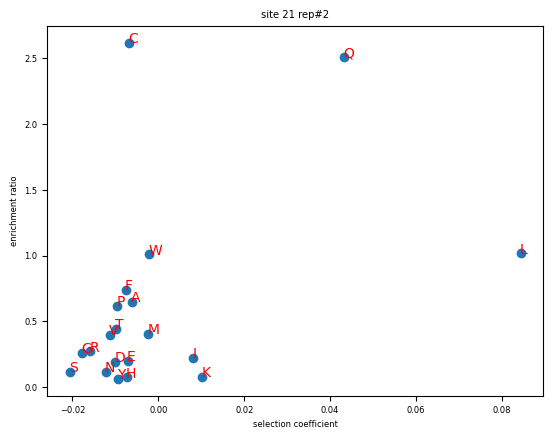

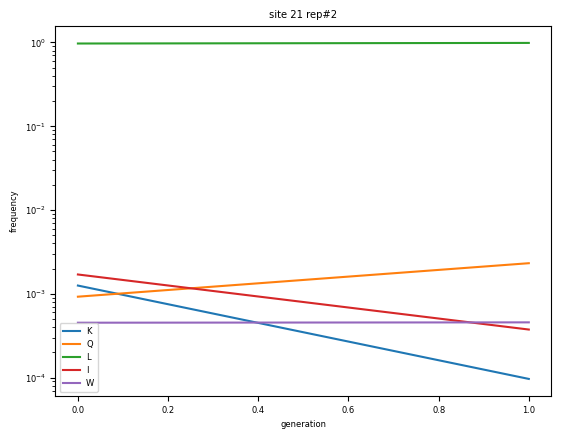

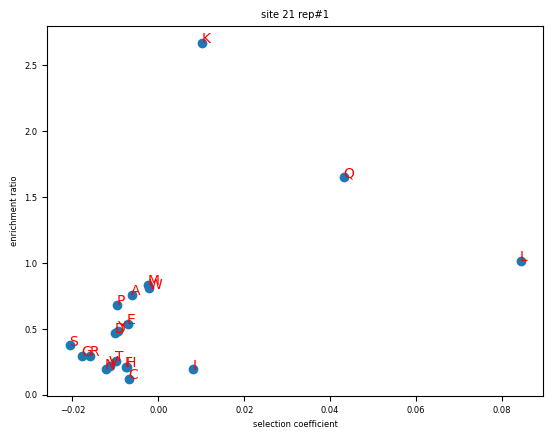

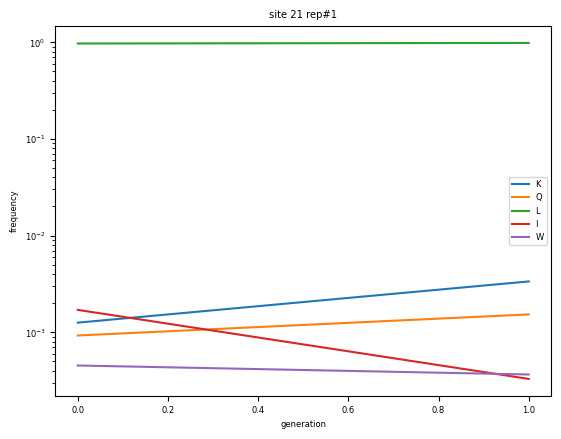

In [640]:
plott(    rep1='Replicate_B_c_0',
            rep2='Replicate_B_c_1',m=21, AA_list=['K','Q','L','I','W'],repp=2)

plott(    rep1='Replicate_D_c_0',
            rep2='Replicate_D_c_1',m=21, AA_list=['K','Q','L','I','W'],repp=1)

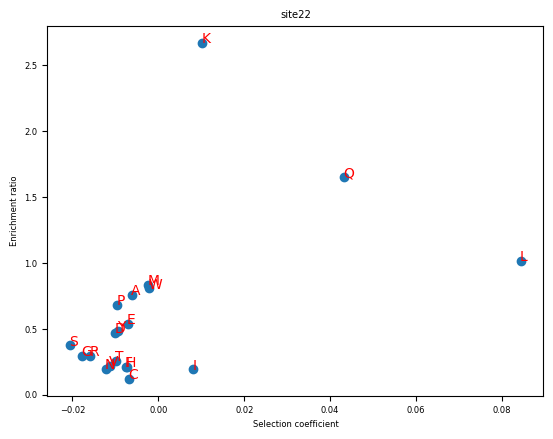

(0.4829357054125361, 0.03101378401614404)


In [618]:
for site in [21]:
    for x,y,z in zip(AA[1:],data1.T[site].iloc[1:], data2.T[site].iloc[1:]):  
        plt.annotate(x,(y-0.0002,z-0.0005),c='red',size=10)
    plt.xlabel('Selection coefficient')
    plt.title('site'+str(site+1))
    plt.ylabel('Enrichment ratio')
    plt.scatter(x=[i for i in data1.T[site].iloc[1:] if i !=0],y=[i for i in data2.T[site].iloc[1:] if i !=0])
    plt.show()

    print(st.pearsonr([i for i in data1.T[site].iloc[1:] if i !=0],[i for i in data2.T[site].iloc[1:] if i !=0]))

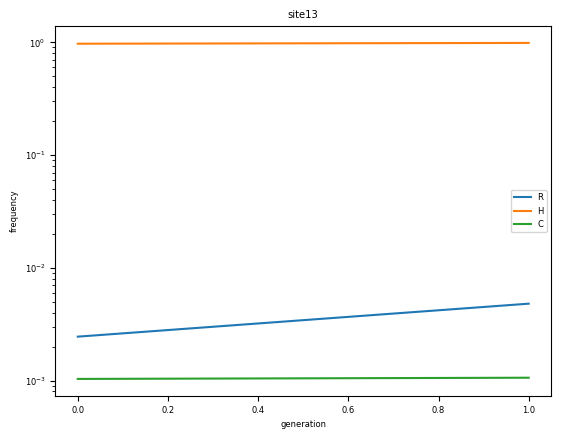

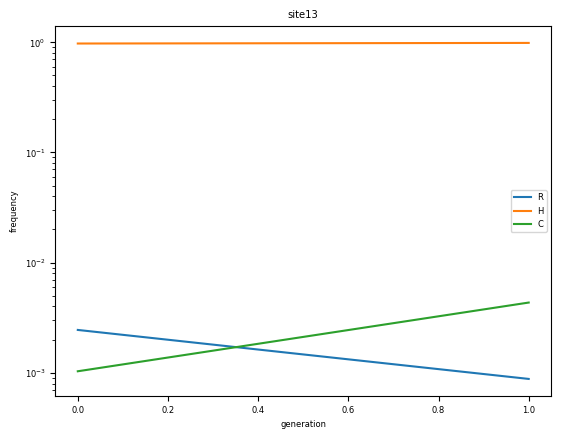

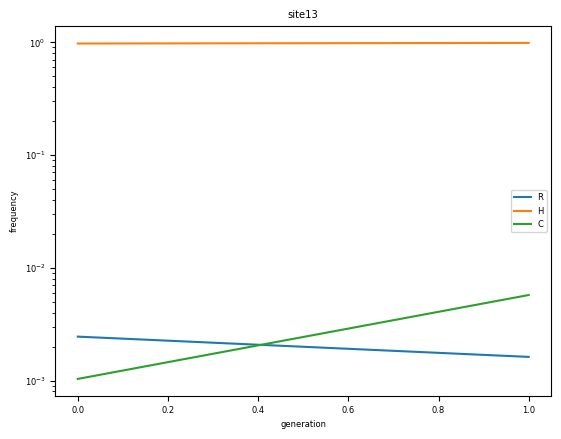

In [595]:
df_count = pd.read_csv('/Users/zhenchenhong/Downloads/DMS_20210329/DMS/further_dataset/TpoR/MPL/allele_counts/single_allele_counts_rep1.csv')
df_count['AA'] = [codon2aa(i) for i in df_count['codon']]
df_count = df_count.drop('codon',axis=1)
df_count=df_count.groupby(['replicate','generation','site','AA'])['counts'].apply(lambda x : x.astype(int).sum())
df_count = df_count.reset_index()

freq_list0 = []
freq_list1 = []
for site in range(1,32):
#     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    freq_list0+= (df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts'].sum()).tolist()

for site in range(1,32):
    freq_list1+= (df_count[(df_count['generation']==1)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==1)&(df_count['site']==site)]['counts'].sum()).tolist()

df_count['frequency'] = freq_list0+freq_list1
df_count_0 = df_count[df_count['generation']==0].drop(['replicate','generation'],axis=1)
df_count_1 = df_count[df_count['generation']==1].drop(['replicate','generation'],axis=1)


AA_list = ['R','H','C']
site=13
for aa in AA_list:
    plt.plot([0,1], [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency']], label=aa)
plt.legend()
plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.title('site13')
plt.show()


df_count = pd.read_csv('/Users/zhenchenhong/Downloads/DMS_20210329/DMS/further_dataset/TpoR/MPL/allele_counts/single_allele_counts_rep2.csv')
df_count['AA'] = [codon2aa(i) for i in df_count['codon']]
df_count = df_count.drop('codon',axis=1)
df_count=df_count.groupby(['replicate','generation','site','AA'])['counts'].apply(lambda x : x.astype(int).sum())
df_count = df_count.reset_index()

freq_list0 = []
freq_list1 = []
for site in range(1,32):
#     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    freq_list0+= (df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts'].sum()).tolist()

for site in range(1,32):
    freq_list1+= (df_count[(df_count['generation']==1)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==1)&(df_count['site']==site)]['counts'].sum()).tolist()

df_count['frequency'] = freq_list0+freq_list1
df_count_0 = df_count[df_count['generation']==0].drop(['replicate','generation'],axis=1)
df_count_1 = df_count[df_count['generation']==1].drop(['replicate','generation'],axis=1)


AA_list = ['R','H','C']
site=13
for aa in AA_list:
    plt.plot([0,1], [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency']], label=aa)
plt.legend()
plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.title('site13')
plt.show()

df_count = pd.read_csv('/Users/zhenchenhong/Downloads/DMS_20210329/DMS/further_dataset/TpoR/MPL/allele_counts/single_allele_counts_rep3.csv')
df_count['AA'] = [codon2aa(i) for i in df_count['codon']]
df_count = df_count.drop('codon',axis=1)
df_count=df_count.groupby(['replicate','generation','site','AA'])['counts'].apply(lambda x : x.astype(int).sum())
df_count = df_count.reset_index()

freq_list0 = []
freq_list1 = []
for site in range(1,32):
#     print(df_freq.loc[df_freq['site']==i]['count0']/df_freq[df_freq['site']==i]['count0'].sum())
    freq_list0+= (df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==0)&(df_count['site']==site)]['counts'].sum()).tolist()

for site in range(1,32):
    freq_list1+= (df_count[(df_count['generation']==1)&(df_count['site']==site)]['counts']/df_count[(df_count['generation']==1)&(df_count['site']==site)]['counts'].sum()).tolist()

df_count['frequency'] = freq_list0+freq_list1
df_count_0 = df_count[df_count['generation']==0].drop(['replicate','generation'],axis=1)
df_count_1 = df_count[df_count['generation']==1].drop(['replicate','generation'],axis=1)


AA_list = ['R','H','C']
site=13
for aa in AA_list:
    plt.plot([0,1], [df_count_0.loc[(df_count_0['site']==site)&(df_count_0['AA']==aa)]['frequency'], df_count_1.loc[(df_count_1['site']==site)&(df_count_1['AA']==aa)]['frequency']], label=aa)
plt.legend()
plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.title('site13')
plt.show()


In [552]:
df_freq

# df_freq=df_freq.groupby(['site', 'amino_acid'])["count0", "count1"].apply(lambda x : x.astype(int).sum())
# df_freq = df_freq.reset_index()
# df_freq
# df_freq['freq0'] = 0
# df_freq['freq1'] = 0
# df_freq[(df_freq['amino_acid']=='F')&(df_freq['site']==14)]

# df_count = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/TpoR/TpoR_MPL/raw_data/nucleotide_count.csv')
# df_count['hgvs_pro'].astype(str)
# df_count   = df_count[~df_count['hgvs_pro'].str.contains('\[')]
# df_count = df_count[['hgvs_pro','Replicate_A_c_0','Replicate_A_c_1']]
# df_count
# df_count[df_count['hgvs_pro'].str.contains('14Phe')]
# df_count_0   1645087   820141

,site,amino_acid,count0,count1,freq0,freq1,pref
0,1,A,38,101,0.000023,0.000123,5.331361
1,1,I,54,36,0.000033,0.000044,1.337239
2,1,N,202,202,0.000123,0.000246,2.005859
3,1,P,107,228,0.000065,0.000278,4.274166
4,1,S,114,196,0.000069,0.000239,3.448669
...,...,...,...,...,...,...,...
586,31,I,87,85,0.000053,0.000104,1.959747
587,31,L,121,247,0.000074,0.000301,4.094604
588,31,S,70,49,0.000043,0.000060,1.404101
589,31,V,111,99,0.000067,0.000121,1.789009


In [502]:
df_count = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/TpoR/TpoR_MPL/raw_data/nucleotide_count.csv')
df_count['hgvs_pro'].astype(str)
df_count   = df_count[(df_count['hgvs_pro'].str.contains('14Phe'))]

df_count

df_count = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/TpoR/TpoR_MPL/raw_data/nucleotide_count.csv')
df_count['hgvs_pro'].astype(str)
df_count   = df_count[~df_count['hgvs_pro'].str.contains('\[')]
df_count = df_count[['hgvs_pro','Replicate_A_c_0','Replicate_A_c_1']]
df_count = df_count.groupby(['hgvs_pro'])['Replicate_A_c_0','Replicate_A_c_1'].apply(lambda x : x.astype(int).sum())
df_count = df_count.reset_index()
df_count   = df_count[(df_count['hgvs_pro'].str.contains('14Phe'))]
df_count
# df_freq[(df_freq['site']==14)&(df_freq['amino_acid']=='F')]

# df_count[df_count['hgvs_pro']=='_wt']
# df_freq[df_freq['site']==2]['count0'].sum()


/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


,hgvs_pro,Replicate_A_c_0,Replicate_A_c_1
233,p.Leu14Phe,2165,172


In [ ]:
df_freq[df_freq['site']==i]['count0'].sum()).tolist()

In [162]:
site=109
AA_list=['N','I','S','T','A']


count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-3_codoncounts.csv')

for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
 

[194150,
 205723,
 222103,
 210628,
 212960,
 206671,
 216745,
 206107,
 203343,
 201098,
 203389,
 200561,
 205510,
 202114,
 204245,
 214304,
 218867,
 215041,
 207101,
 214446,
 218890,
 206776,
 219298,
 211205,
 212870,
 212340,
 206436,
 204465,
 211032,
 204458,
 194285]

In [3]:
len(AA_dict['A'])
AA_list_copy = AA_dict.copy()
SEQUENCE = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
for i in range(len(SEQUENCE)):
    AA_list_copy[SEQUENCE[i]][i]=1
AA_list_copy

{'A': [0.82788073,
  0.50563817,
  0.254185453,
  -1.44740428,
  -1.215500548,
  1,
  -1.410112473,
  0,
  0.421539565,
  -0.070565241,
  1,
  -0.999478966,
  -0.6039716589999999,
  0.2432003519999999,
  0.088482281,
  -1.415177823,
  0.183652962,
  0.270436433,
  -1.5478867040000002,
  -1.679803937,
  -1.622533337,
  -2.7408661910000003,
  -2.503229988,
  -0.738879753,
  1.006793458,
  -1.807009909,
  -0.94609026,
  -2.527765133,
  -1.217675045,
  0,
  -0.0298339629999999,
  -0.516670775,
  -2.144736326,
  -2.679853221],
 'C': [0.50091431,
  -0.3010536689999999,
  0,
  0,
  0,
  -0.967732115,
  -1.0246440209999998,
  -2.083586277,
  0,
  0,
  -2.225505865,
  0,
  -2.089499475,
  -1.5026337280000002,
  -1.088068987,
  -1.281634132,
  0,
  -0.827331622,
  -2.217095552,
  -2.081215087,
  0,
  -1.891627626,
  -1.393643721,
  -0.404491611,
  0.96979926,
  0,
  -0.255268188,
  0,
  0,
  -2.22495298,
  0,
  -1.7700406480000002,
  0,
  -1.863808431],
 'D': [1,
  1.2062448140000002,
  0,
  0,


In [4]:
site=6
df_AA[df_AA['site']==site]
data[data['site']==site].iloc[1:]
temp = pd.merge(df_AA[df_AA['site']==site], data[data['site']==site].iloc[1:], on=['site', 'amino_acid'])
AA_wt = SEQUENCE[site-2]
print(SEQUENCE)
temp[~((temp['amino_acid']!=AA_wt)&(temp['pref']==0))]


DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR


,site,amino_acid,pref,rep_1,rep_2
0,6,A,-1.215501,-0.050449,-0.028158
3,6,E,-1.778132,-0.008354,-0.022634
5,6,G,-0.378292,0.023276,0.007266
6,6,H,-2.213990,-0.015689,-0.017553
8,6,K,-2.013128,0.007307,-0.011023
9,6,L,-1.361830,-0.066625,-0.052375
10,6,M,-1.795707,-0.016559,-0.012635
12,6,P,0.000000,0.263188,0.270616
13,6,Q,-1.132602,-0.030023,-0.015455
14,6,R,-1.531454,-0.046093,-0.053623


In [5]:
correlation_list = []
for i in range(34):
    site=i+2
#     df_AA[df_AA['site']==site]
    preference = df_AA[df_AA['site']==site]['pref'].tolist()

    SELECTION_FILE = FIG2_HUMAN_DIR + 'YAP1/selection_coefficients/YAP1_-4.csv.gz'
    data = pd.read_csv(SELECTION_FILE).drop('rep_2', axis=1)
    selection = data[data['site']==site].iloc[1:]['rep_1']
    
    temp = pd.merge(df_AA[df_AA['site']==site], data[data['site']==site].iloc[1:], on=['site', 'amino_acid'])
    AA_wt = SEQUENCE[site-2]
#     print(SEQUENCE)
    temp = temp.loc[~((temp['amino_acid']!=AA_wt)&(temp['pref']==0))]

#     print()

    correlation_list.append(st.pearsonr(temp['pref'], temp['rep_1'])[0])
    plt.scatter(temp['pref'], temp['rep_1'])
    plt.title(str(site) +', '+ str(st.pearsonr(temp['pref'], temp['rep_1'])[0]))
    plt.xlabel('functional score')
    plt.ylabel('selection')
    plt.show()
    

NameError: name 'st' is not defined

Text(0.5, 1.0, 'MPL and functional score of single site selection coefficient inference')

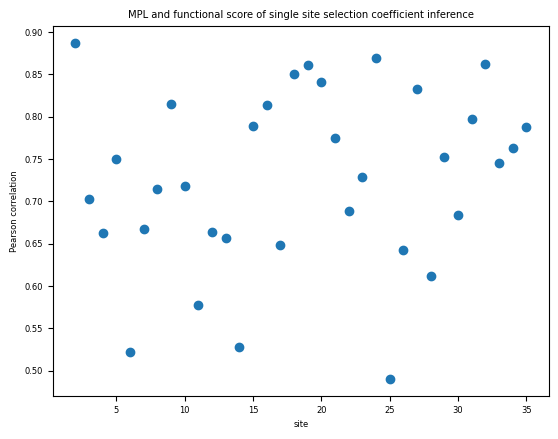

In [97]:
plt.scatter([i+2 for i in range(len(correlation_list))], correlation_list)
plt.xlabel('site')
plt.ylabel('Pearson correlation')
plt.title('MPL and functional score of single site selection coefficient inference')

In [63]:
SELECTION_FILE = FIG2_HUMAN_DIR + 'YAP1/selection_coefficients/YAP1_-4.csv.gz'
data = pd.read_csv(SELECTION_FILE).drop('rep_2', axis=1)
data[data['site']==10].iloc[1:]

,site,amino_acid,rep_1
169,10,A,0.203632
170,10,C,0.000000
171,10,D,0.154318
172,10,E,0.042429
173,10,F,0.000000
174,10,G,0.569062
175,10,H,-0.024021
176,10,I,-0.030782
177,10,K,-0.241119
178,10,L,-0.059151


ValueError: Length of values (30) does not match length of index (40)

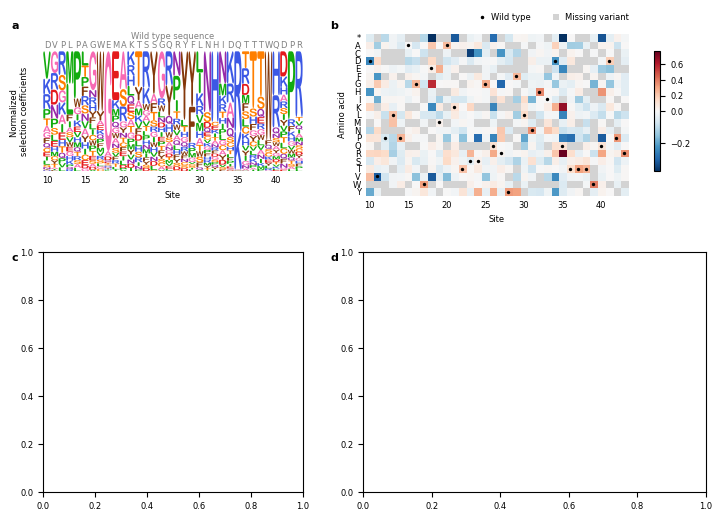

<Figure size 640x480 with 0 Axes>

In [6]:
import os
import sys

import numpy as np

import scipy as sp
import scipy.stats as st

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import cv2

import seaborn as sns 

import logomaker as lm

from matplotlib.lines import Line2D
import warnings
TEXT_FONTSIZE = 6
SERIAL_FONTSIZE = 8
TEXT_FONT = 'Arial'
FIG_DPI = 400
CM = 1/2.54

SERIAL_FONT = {
    'family': TEXT_FONT,
    'size': SERIAL_FONTSIZE,
    'weight': 'bold'
}

FONT = {
    'family': TEXT_FONT,
    'weight': 'normal',
    'size': TEXT_FONTSIZE
}

REGION_FONT = {
    'family': TEXT_FONT,
    'weight': 'bold',
    'size': TEXT_FONTSIZE
}

matplotlib.rc('font', **FONT)

FIG_FILE = './figures/'

matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size': TEXT_FONTSIZE})
SERIAL_FONT = {
    'size'  : TEXT_FONTSIZE + 2,
    'weight': 'bold'}
OFFSET_LETTER  = 0
SELECTION_FILE = FIG2_HUMAN_DIR + 'YAP1/selection_coefficients/YAP1_-4.csv.gz'
EPISTASIS_FILE = './outputs/epistasis/YAP1_100.txt'
INDEX_FILE     = './outputs/epistasis/index_matrix.csv'
SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
PAPER_FIGURE_SIZE_X = 18
PAPER_FIGURE_SIZE_Y = 14
EXAMPLE_FIG_SIZE    = (PAPER_FIGURE_SIZE_X * CM, PAPER_FIGURE_SIZE_Y * CM)

AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])
Amino_acid_dict = {'Ala': 'A',
                   'Arg': 'R',
                   'Asn': 'N',
                   'Asp': 'D',
                   'Cys': 'C',
                   'Gln': 'Q',
                   'Glu': 'E',
                   'Gly': 'G',
                   'His': 'H',
                   'Ile': 'I',
                   'Leu': 'L',
                   'Lys': 'K',
                   'Met': 'M',
                   'Phe': 'F',
                   'Pro': 'P',
                   'Ser': 'S',
                   'Thr': 'T',
                   'Trp': 'W',
                   'Tyr': 'Y',
                   'Val': 'V',
                   'Ter': '*'
                  }
exp_scale = 10
sites_per_line = 35
fig = plt.figure(figsize = EXAMPLE_FIG_SIZE)
text_in_figure = {
    'fontsize': TEXT_FONTSIZE,
    'bbox'    : {'facecolor': 'none', 'edgecolor': 'none', 'boxstyle': 'round'},
    'ha'      : 'center',
    'va'      : 'center'
}
fig.text(0.02, 0.94, s = 'a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47, 0.94, s = 'b', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.02, 0.52, s = 'c', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47, 0.52, s = 'd', **SERIAL_FONT, transform = fig.transFigure)
data = pd.read_csv(SELECTION_FILE)
site_list = data['site'].unique().tolist()
rep_list  = data.columns[2:]
BOX_FIGURE3 = dict(left = 0.065, right = 1, bottom = 0.1, top = 0.9)
gs = fig.add_gridspec(5, 6, 
                      wspace = 1, 
                      hspace = 3.5, 
                      width_ratios  = [1,   1,   1,   1.6, 1.6, 1.6], 
                      height_ratios = [1.2, 1.2, 1.6, 1.6, 1.6], **BOX_FIGURE3)
ax1 = fig.add_subplot(gs[:2, :3])
ax2 = fig.add_subplot(gs[:2, 3:])
ax3 = fig.add_subplot(gs[2:, :3])
ax4 = fig.add_subplot(gs[2:, 3:])
MPL_scale  = 8
PREF_scale = 2
for rep in [rep_list[0]]:
# logo plot
    data1 = data[['site', 'amino_acid', rep]]
    data1 = pd.pivot_table(data1, values = rep, index = ['site'], columns = ['amino_acid']).reset_index()
    data1.set_index('site', inplace = True)
    data1 = data1.drop(['*'], axis = 1)
    data1.replace(0, np.nan, inplace = True)
    totle_line_num = len(data1.columns)
    num_line = int(totle_line_num/sites_per_line) + 1
    for i in range(num_line):
        if i != num_line - 1:
            data_sub = data1[i*sites_per_line: (i + 1) * sites_per_line]               
        else:
            data_sub = data1[i*sites_per_line:]
        site_sub = data_sub.columns.tolist()  
        data_exp = np.exp(MPL_scale*data_sub)
        data_exp = data_exp.div(data_exp.sum(axis = 1), axis = 0)            
        data_exp = data_exp.replace(np.nan, 0)
        logo = lm.Logo(data_exp, 
                       ax           = ax1,
                       figsize      = [15 * len(site_sub)/sites_per_line,4],
                       font_name    = 'Arial Rounded MT Bold',
                       color_scheme = 'dmslogo_funcgroup')

        logo.style_xticks( fmt = '%d', anchor = 0)
        logo.ax.set_ylabel("Normalized \nselection coefficients", fontsize = TEXT_FONTSIZE)
        logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)

        for j in range(len(SEQUENCE)):
            logo.ax.text(j + 2, 1.05, SEQUENCE[j], **text_in_figure, color = 'grey')
        logo.ax.text(18.5, 1.125, 'Wild type sequence', **text_in_figure, color = 'grey') 
        logo.style_spines(spines=['bottom', 'right', 'left', 'top'], visible = False)

    ax1.set_yticks([])
    ax1.set_xticks([i +  data_exp.index.tolist()[0] for i in range(len(data_exp.index.tolist())) if (i)%5 == 0])
    ax1.set_xticklabels([data_exp.index.tolist()[i] + 8 for i in range(len(data_exp.index.tolist())) if (i)%5 == 0])
    ax1.tick_params(axis = u'both', which = u'both', length = 0)
    ax1.yaxis.labelpad = 10
    ax1.xaxis.set_tick_params(width = 0)

# heatmap
    left_n = 3
    data1 = data[['site', 'amino_acid', rep]].copy()
    data1 = pd.pivot_table(data1, values = rep, index = ['amino_acid'], columns = 'site').reset_index()
    data1.set_index('amino_acid', inplace = True)
    totle_line_num = len(data1.columns)
    num_line = int(totle_line_num/sites_per_line) + 1
    for i in range(num_line):
        if i != num_line - 1:
            data_sub = data1[data1.columns[i * sites_per_line: (i + 1) * sites_per_line]]               
        else:
            data_sub = data1[data1.columns[i * sites_per_line:]]
        site_sub = data_sub.columns.tolist()
        norm = mcolors.TwoSlopeNorm(vcenter = 0)
        color_map = plt.cm.get_cmap('RdBu')
        hm = ax2.imshow(data_sub,
                        cmap   = color_map.reversed(), 
                        norm   = norm, 
                        aspect = 'equal',
                        extent = (-0.5 - left_n, data_sub.shape[1] - 0.5 - left_n, data_sub.shape[0] - 0.5, -0.5))
        white_entry = data_sub.isin([0])
        return_df   = data_sub.copy()
        white_entry = white_entry.astype(int)
        white_entry = white_entry.iloc[::-1]
        cmap   = mcolors.ListedColormap(['#FF000000', 'lightgray'])
        bounds = [-1,0.5,1.5]
        norm   = mcolors.BoundaryNorm(bounds, cmap.N)
        ax2.imshow(white_entry, interpolation = 'nearest', origin = 'lower',
                   cmap = cmap, norm = norm,aspect = 'equal',
                   extent = (-0.5 - left_n, data_sub.shape[1] - 0.5 - left_n, data_sub.shape[0] - 0.5, -0.5))

        clb = fig.colorbar(hm, ax = ax2, orientation = 'vertical', pad = 0.1)
        clb.ax.set_xlabel('Selection\ncoefficient', fontsize = TEXT_FONTSIZE)
        index_of_element_to_outline = []

        for j in range(len(site_sub)):
            index_of_element_to_outline.append([j - 0.5 - left_n, AA.index(SEQUENCE[site_list.index(site_sub[j])]) - 0.5])

        for outliner in index_of_element_to_outline:
            ax2.scatter(outliner[0] + 0.5, outliner[1] + 0.5, c = 'black', s = 2)

    ax2.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
    ax2.set_ylabel("Amino acid", fontsize = TEXT_FONTSIZE)
    ax2.set_xticks([i-3 for i in range(len(site_sub)) if i%5 == 0])
    ax2.set_xticklabels([site_sub[i]+8 for i in range(len(site_sub)) if (i)%5 == 0])
    ax2.set_yticks([i for i in range(len(AA))])
    ax2.set_yticklabels([AA[i] for i in range(len(AA))])
    ax2.tick_params(axis = u'both', which = u'both', length = 0)
    ax2.spines[ 'right'].set_visible(False)
    ax2.spines[  'top' ].set_visible(False)
    ax2.spines[ 'left' ].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    legend_elements = [
                        Line2D([], [], marker = 'o', linestyle = 'None',
                              color = 'black', label = 'Wild type', markersize = 1.5),
                        Line2D([], [], marker = 's', linestyle = 'None',
                              markerfacecolor = 'lightgray', markeredgewidth = 0, label = 'Missing variant', markersize = 5)
                       ]
    ax2.legend(handles = legend_elements, loc = [0.4, 1.05], ncol = 2, frameon = False, fontsize = TEXT_FONTSIZE, handletextpad = 0.1)
    ax2.set_position([0.52, 0.6, 0.37, 0.37])

# Comparison Logoplot
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,subplot_spec = ax3, wspace = 0.1, hspace = 0.5)
    df_enrich   = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
    df_enrich['hgvs_pro'].astype(str)
    df_enrich   = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
    df_enrich   = df_enrich[ df_enrich['hgvs_pro'].str.contains('p.')]
    mutant_list = df_enrich['hgvs_pro'].tolist()
    pref_list   = df_enrich['score_101208'].tolist()
    AA_dict     = {}
    for aa in AA:
        if aa != '*':
            AA_dict[aa] = [0] * 34
    site_lll = set()
    for i in range(len(mutant_list)):
        if mutant_list[i][-1] != '?':
            mutants = mutant_list[i][-3:]
            site_lll.add(int(mutant_list[i][5: -3]))
            short_AA = Amino_acid_dict[mutants]
            if short_AA != '*':
                if mutant_list[i][5:-3] != '':
                    site = int(mutant_list[i][5: -3]) - 1
                AA_dict[short_AA][site] = pref_list[i]

    df_AA = pd.DataFrame(columns = ['site', 'amino_acid', 'pref'])
    site_list = []
    amino_acid_list = []
    pref_list = []
    for aa, pref in AA_dict.items():
        for i in range(len(pref)):
            site_list.append(i + 2)
            pref_list.append(pref[i])
            amino_acid_list.append(aa)
    df_AA['site'] = site_list
    df_AA['amino_acid'] = amino_acid_list
    df_AA['pref'] = pref_list
    data2 = pd.pivot_table(df_AA, values = 'pref', index = ['site'], columns = ['amino_acid']).reset_index()
    data2['site'] = [str(i) + '_Pref' for i in data2['site'].tolist()]

    data = pd.read_csv(SELECTION_FILE)
    site_list = data['site'].unique().tolist()
    rep_list = data.columns[2:]

    sites_per_line = 35
    exp_scale = 10
    plt.figure()
    data1 = data[['site', 'amino_acid', 'rep_1']]

    data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
    data1 = data1.drop(['*'], axis = 1)
    data1['site'] = [str(i) + '_MPL' for i in data1['site'].tolist()]


    df_all  = data1[0: 0].copy()
    df_zero = data1[0: 1].copy()
    for col in df_zero.columns:
        df_zero[col].values[:] = 0
    selected_rows = [10, 16, 27, 
                     4,  13, 28,
                     29, 30, 20,
                    2,3,5]
    k = 10 * len(selected_rows)
    m = 0
    for i in selected_rows:
        #MPL
        if m%3 == 0:
            df_all = df_all.append(df_zero)
        m += 1
        df_all    = df_all.append(df_zero)
        df_temp   = data1[data1['site'] == str(i) + '_MPL'].copy()
        temp_pure = df_temp[df_temp.columns[1:]]

        temp_pure = np.exp(MPL_scale * temp_pure)
        temp_pure.replace(1, 0, inplace = True)
        temp_pure = temp_pure.div(temp_pure.sum(axis = 1), axis = 0)
        df_all = df_all.append(temp_pure)

        #PREF
        df_temp   = data2[data2['site'] == str(i) + '_Pref'].copy()
        temp_pure = df_temp[df_temp.columns[1:]]
        temp_pure = np.exp(PREF_scale * temp_pure)
        temp_pure.replace(1, 0, inplace = True)
        temp_pure = temp_pure.div(temp_pure.sum(axis = 1), axis = 0)
        df_all = df_all.append(temp_pure)

    df_all['plot_site'] = [i for i in range(10)] + [i for i in range(10)] + [i for i in range(10)]
    plot_index = df_all['site']
    df_all = df_all.drop(['site'], axis = 1)

    df_all.set_index('plot_site', inplace = True)
    total_line_num = len(df_all.columns)
    sites_per_line = int(df_all.shape[0]/3)
    num_line = int(total_line_num/sites_per_line) + 1
    ax3.set_yticks([])
    ax3.set_xticks([])

    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.spines['left'].set_visible(False)

    for i in range(num_line):
        ax3_sub = plt.Subplot(fig, inner[i])
        if i != num_line -1:
            data_sub = df_all[i * sites_per_line: (i + 1) * sites_per_line].copy()              
        else:
            data_sub = df_all[i * sites_per_line:].copy()
        site_sub = data_sub.columns.tolist()  
        logo = lm.Logo(data_sub, 
                       ax           = ax3_sub,
                       figsize      = [5, 2],
                       font_name    = 'Arial Rounded MT Bold',
                       color_scheme = 'dmslogo_funcgroup')

        logo.style_spines(spines = ['right', 'top'], visible = False)
        logo.ax.set_xlim([-2, 10])

        if i == 0:
            logo.ax.text(2.5, 1.1, 'Site 10(E)', **text_in_figure)
            logo.ax.text(5.5, 1.1, 'Site 16(S)', **text_in_figure)
            logo.ax.text(8.5, 1.1, 'Site 27(Q)', **text_in_figure)
            logo.ax.text(-.5, .5, 'Similar\ninference\n(Wild Type)', **text_in_figure)

        if i == 1:
            logo.ax.text(2.5, 1.1, 'Site  4(P)', **text_in_figure)
            logo.ax.text(5.5, 1.1, 'Site 13(K)', **text_in_figure)
            logo.ax.text(8.5, 1.1, 'Site 28(T)', **text_in_figure)
            logo.ax.set_ylabel("Normalized measurements", fontsize = TEXT_FONTSIZE, labelpad=10)
            logo.ax.text(-.5, .5, 'Similar\ninference\n(Tolerance)', 
                         fontsize = TEXT_FONTSIZE, 
                         bbox=dict(facecolor = 'none', 
                                   edgecolor = 'none', 
                                   boxstyle  = 'round'), 
                         ha = 'center', va = 'center')

        else:
            logo.ax.set_ylabel(" ", fontsize = TEXT_FONTSIZE, labelpad = 3)
        if i == 2:
            logo.ax.text(2.5, 1.1, 'Site 29(T)', **text_in_figure)
            logo.ax.text(5.5, 1.1, 'Site 30(T)', **text_in_figure)
            logo.ax.text(8.5, 1.1, 'Site 34(P)', **text_in_figure)
            logo.ax.text(-.5, .5, 'Different\ninference', 
                         fontsize = TEXT_FONTSIZE, 
                         bbox = dict(facecolor ='none', 
                                   edgecolor   = 'none', 
                                   boxstyle    = 'round'), 
                         ha = 'center', va = 'center')

            logo.ax.set_xticks([2, 3, 4, 5, 6, 7, 8, 9])
            logo.ax.set_xticklabels(['MPL', 'PREF', ' ', 'MPL', 'PREF', ' ', 'MPL', 'PREF'], linespacing = 1.5, rotation = 30)
            logo.ax.xaxis.get_major_ticks()[2].set_visible(False)
            logo.ax.xaxis.get_major_ticks()[5].set_visible(False)
        else:

            logo.ax.set_xticks([i for i in range(2,10)])
            logo.ax.set_xticklabels([' '] * 8)
            logo.ax.xaxis.get_major_ticks()[2].set_visible(False)
            logo.ax.xaxis.get_major_ticks()[5].set_visible(False)
        logo.ax.set_yticks([])
        logo.ax.spines['left'].set_visible(False)
        fig.add_subplot(ax3_sub)      

# epistasis
    with open(EPISTASIS_FILE) as f:
        content = f.readlines()
    content = [float(x.strip()) for x in content]
    df_index = pd.read_csv(INDEX_FILE, header=None)
    df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
    index_list = df_index['mat_index'].tolist()
    selection_list = [content[i] for i in index_list]
    df_index['selection_coefficients'] = selection_list
    df_index['site_1'] = df_index['state_1']/21 + 2
    df_index['site_1'] = df_index['site_1'].astype(int)
    df_index['AA_1']   = df_index['state_1']%21
    df_index['AA_1']   = [AA[x] for x in df_index['AA_1'].tolist()]
    df_index['site_2'] = df_index['state_2']/21 + 2
    df_index['site_2'] = df_index['site_2'].astype(int)
    df_index['AA_2']   = df_index['state_2']%21
    df_index['AA_2']   = [AA[x] for x in df_index['AA_2'].tolist()]

    cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
    df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

    WT_list = []; axis_1 = []; axis_2 = []
    for i in range(len(SEQUENCE)):
        WT_list.append(i * 21 + AA.index(SEQUENCE[i]))
    df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2'] != df_index['state_1'])]
    df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

    df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
    df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
    df_WT_epi['site_1'] += 8
    df_WT_epi['site_2'] += 8
    df_WT_epi_ = df_WT_epi.copy()
    df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
    df_WT_epi  = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
    flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")
    hm = ax4.imshow(flights,cmap='Greys', aspect = 'equal', vmin = 0)
    ax4.set_xlabel('Site', labelpad = 7)
    ax4.set_ylabel('Site', labelpad = 7)
    ax4.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['left'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)

    ax4.set_xticks([i for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
    ax4.set_xticklabels([i + 10 for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
    ax4.set_yticks([i for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
    ax4.set_yticklabels([i + 10 for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
    ax4.tick_params(axis = u'both', which = u'both', length = 0)
    ax4.invert_yaxis()


    blue_alpha   = 0.5
    orange_alpha = 0.4

    ax4.axhspan(-0.5, 2.5, color = "lightblue", alpha = blue_alpha, lw = 0)
    ax4.axvspan(-0.5, 2.5, color = "lightblue", alpha = blue_alpha, lw = 0)


    ax4.axhspan(11.5, 16.5, color = "lightblue", alpha = blue_alpha, lw = 0)
    ax4.axvspan(11.5, 16.5, color = "lightblue", alpha = blue_alpha, lw = 0)


    ax4.axhspan(21.5, 25.5, color = "lightblue", alpha = blue_alpha, lw = 0)
    ax4.axvspan(21.5, 25.5, color = "lightblue", alpha = blue_alpha, lw = 0)

    ax4.fill([-0.5, -0.5, 2.5,  2.5],  [-0.5, 2.5,  2.5,  -0.5], 'coral', alpha = orange_alpha)
    ax4.fill([-0.5, -0.5, 2.5,  2.5],  [11.5, 16.5, 16.5, 11.5], 'coral', alpha = orange_alpha)
    ax4.fill([11.5, 16.5, 16.5, 11.5], [-0.5, -0.5, 2.5,  2.5],  'coral', alpha = orange_alpha)
    ax4.fill([11.5, 16.5, 16.5, 11.5], [11.5, 11.5, 16.5, 16.5], 'coral', alpha = orange_alpha)
    ax4.fill([21.5, 25.5, 25.5, 21.5], [-0.5, -0.5, 2.5,  2.5],  'coral', alpha = orange_alpha)
    ax4.fill([-0.5, -0.5, 2.5,  2.5],  [21.5, 25.5, 25.5, 21.5], 'coral', alpha = orange_alpha)
    ax4.fill([21.5, 21.5, 25.5, 25.5], [21.5, 25.5, 25.5, 21.5], 'coral', alpha = orange_alpha)
    ax4.fill([11.5, 16.5, 16.5, 11.5], [21.5, 21.5, 25.5, 25.5], 'coral', alpha = orange_alpha)
    ax4.fill([21.5, 21.5, 25.5, 25.5], [11.5, 16.5, 16.5, 11.5], 'coral', alpha = orange_alpha)

    ax4.axvline(x = 2.5,  ls = '--', color = 'black', lw = 1)
    ax4.axvline(x = 11.5, ls = '--', color = 'black', lw = 1)
    ax4.axvline(x = 16.5, ls = '--', color = 'black', lw = 1)
    ax4.axvline(x = 21.5, ls = '--', color = 'black', lw = 1)
    ax4.axvline(x = 25.5, ls = '--', color = 'black', lw = 1)

    ax4.axhline(y = 2.5,  ls = '--', color = 'black', lw = 1)
    ax4.axhline(y = 11.5, ls = '--', color = 'black', lw = 1)
    ax4.axhline(y = 16.5, ls = '--', color = 'black', lw = 1)
    ax4.axhline(y = 21.5, ls = '--', color = 'black', lw = 1)
    ax4.axhline(y = 25.5, ls = '--', color = 'black', lw = 1)

    clb = fig.colorbar(hm, ax = ax4, orientation = 'vertical', pad = 0.07, shrink = 0.6)
    clb.ax.set_xlabel(r'$\sum$|epistasis|', fontsize = TEXT_FONTSIZE)

plt.tight_layout()
fig.savefig(FIG_FILE + 'Fig3_realdata.pdf', dpi = 400)
plt.show()  

In [7]:
pref = pd.read_csv('./data/virus_protein/HIVEnv/BG505/pref/rescaled_BG505-1_prefs.csv')
site=31
pref_list = pref[pref['site']==str(site)].T.iloc[1:].iloc[:, 0]
pref_list
pref

,site,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,31,0.042503,0.034751,0.020493,0.048150,0.321789,0.013652,0.036373,0.006376,0.059630,...,0.058416,0.022588,0.029284,0.021466,0.030879,0.059312,0.125148,0.032837,0.022077,0.003919
1,32,0.006255,0.253641,0.040554,0.062596,0.000567,0.041529,0.048334,0.010687,0.038069,...,0.007589,0.065473,0.076706,0.061207,0.162738,0.052888,0.019763,0.029419,0.001426,0.000768
2,33,0.011573,0.026848,0.007435,0.021231,0.048187,0.027980,0.133534,0.022617,0.005796,...,0.222399,0.048287,0.044671,0.071398,0.019211,0.074799,0.037706,0.027570,0.060830,0.035234
3,34,0.204295,0.000950,0.000185,0.047398,0.014651,0.017008,0.005581,0.083467,0.020578,...,0.001954,0.000837,0.031231,0.081602,0.014999,0.031813,0.062038,0.055100,0.026721,0.246060
4,35,0.000604,0.011331,0.001072,0.000904,0.350892,0.000977,0.000411,0.004198,0.005967,...,0.001816,0.000430,0.000274,0.000522,0.000930,0.000266,0.000180,0.000347,0.443885,0.173936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,698,0.026052,0.050066,0.000394,0.004495,0.006819,0.112970,0.000216,0.027459,0.000986,...,0.029911,0.001237,0.063198,0.000297,0.000290,0.100633,0.077064,0.062556,0.372831,0.021889
666,699,0.035787,0.024200,0.037336,0.018650,0.025796,0.016761,0.076611,0.012449,0.176854,...,0.027920,0.257321,0.006591,0.082605,0.006996,0.044991,0.009228,0.023341,0.011130,0.068702
667,700,0.062599,0.016221,0.035611,0.231781,0.061437,0.054147,0.010014,0.033875,0.046865,...,0.105598,0.003404,0.007678,0.013779,0.000539,0.022464,0.021677,0.054799,0.007319,0.118076
668,701,0.010633,0.051301,0.002328,0.013951,0.054704,0.084134,0.018008,0.005315,0.005601,...,0.417289,0.001828,0.001615,0.001089,0.000099,0.068676,0.110090,0.091110,0.008691,0.016717


In [8]:
sele = pd.read_csv('./outputs/virus_protein/HIVEnv/BG505/selection_coefficients/HIV Env BG505_-3.csv.gz')
sele

,site,amino_acid,rep_1,rep_2,rep_3
0,0,*,-0.015366,-0.042260,0.012669
1,0,A,-0.010532,-0.018857,-0.020996
2,0,C,-0.022502,0.024385,0.013555
3,0,D,0.042478,0.050873,0.010465
4,0,E,0.054953,-0.004550,0.008849
...,...,...,...,...,...
14065,669,S,-0.049961,0.011372,0.004885
14066,669,T,-0.028438,0.050798,-0.015883
14067,669,V,-0.017808,0.002355,-0.013677
14068,669,W,0.011237,-0.018501,-0.023079


In [122]:
len(sele['site'].unique())

670

In [9]:
corr_list = []
sele_all = []
pref_all = []
# set(sele['site'].unique()).intersection(list_two)
for site in range(670):
    pref_list = pref.iloc[site].T.iloc[1:].tolist()
    sele_list = sele[sele['site']==site].iloc[1:]['rep_1'].tolist()
    exp_list = [np.exp(i*10) for i in sele_list]
    sele_list = [i/np.sum(exp_list) for i in exp_list]
    sele_all+=sele_list
    pref_all+=pref_list
    corr_list.append(st.pearsonr(pref_list, sele_list)[0])
corr_list

[0.04232648002869093,
 -0.044754199652355164,
 0.6463773006713407,
 -0.32782902189757684,
 -0.09226247190948549,
 0.0890635824514705,
 0.12599498670397694,
 -0.051548485953535846,
 -0.0920610697748936,
 -0.0473060707998508,
 -0.056339660870908796,
 -0.06146729275664957,
 -0.055574860277481944,
 -0.10385548778908281,
 -0.02575652409013317,
 -0.0869532048586159,
 -0.1271929299499281,
 0.5974283611995664,
 -0.1776466188525766,
 0.19208797370052655,
 -0.10111815433287184,
 -0.11180696449814118,
 -0.07106380789917464,
 -0.056272733667256235,
 -0.10348325078375822,
 -0.14552249108748946,
 0.2889564826162927,
 -0.0705965694603397,
 -0.003838946478417902,
 -0.1302398293001108,
 -0.11500179001735232,
 -0.043089218965640746,
 -0.3235000968531957,
 -0.05766799436441178,
 -0.0357215840987722,
 -0.38630795418985164,
 -0.25415292069627027,
 -0.09260245449584234,
 0.36989660480730613,
 -0.08089944920678949,
 -0.17493724356797088,
 0.5423937065141008,
 -0.13968873853536462,
 -0.053244499690663624,
 -0

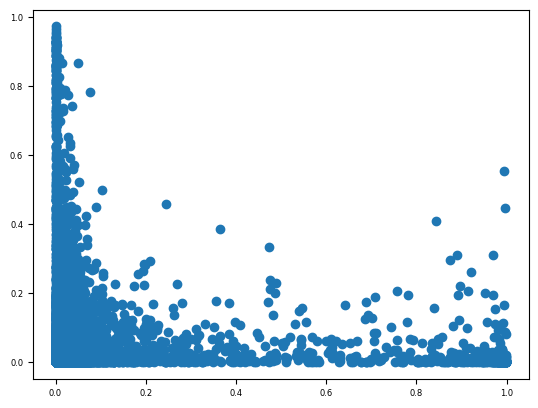

In [10]:
plt.scatter(sele_all, pref_all)

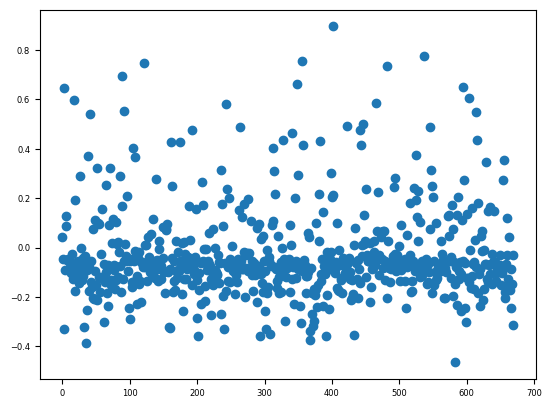

In [11]:
plt.scatter([i for i in range(670)], corr_list)

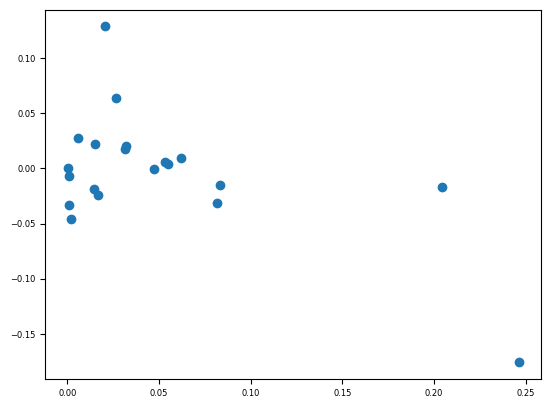

In [12]:
site=3
pref_list = pref.iloc[site].T.iloc[1:].tolist()
sele_list = sele[sele['site']==site].iloc[1:]['rep_1'].tolist()
plt.scatter(pref_list, sele_list)

In [13]:
pref

,site,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,31,0.042503,0.034751,0.020493,0.048150,0.321789,0.013652,0.036373,0.006376,0.059630,...,0.058416,0.022588,0.029284,0.021466,0.030879,0.059312,0.125148,0.032837,0.022077,0.003919
1,32,0.006255,0.253641,0.040554,0.062596,0.000567,0.041529,0.048334,0.010687,0.038069,...,0.007589,0.065473,0.076706,0.061207,0.162738,0.052888,0.019763,0.029419,0.001426,0.000768
2,33,0.011573,0.026848,0.007435,0.021231,0.048187,0.027980,0.133534,0.022617,0.005796,...,0.222399,0.048287,0.044671,0.071398,0.019211,0.074799,0.037706,0.027570,0.060830,0.035234
3,34,0.204295,0.000950,0.000185,0.047398,0.014651,0.017008,0.005581,0.083467,0.020578,...,0.001954,0.000837,0.031231,0.081602,0.014999,0.031813,0.062038,0.055100,0.026721,0.246060
4,35,0.000604,0.011331,0.001072,0.000904,0.350892,0.000977,0.000411,0.004198,0.005967,...,0.001816,0.000430,0.000274,0.000522,0.000930,0.000266,0.000180,0.000347,0.443885,0.173936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,698,0.026052,0.050066,0.000394,0.004495,0.006819,0.112970,0.000216,0.027459,0.000986,...,0.029911,0.001237,0.063198,0.000297,0.000290,0.100633,0.077064,0.062556,0.372831,0.021889
666,699,0.035787,0.024200,0.037336,0.018650,0.025796,0.016761,0.076611,0.012449,0.176854,...,0.027920,0.257321,0.006591,0.082605,0.006996,0.044991,0.009228,0.023341,0.011130,0.068702
667,700,0.062599,0.016221,0.035611,0.231781,0.061437,0.054147,0.010014,0.033875,0.046865,...,0.105598,0.003404,0.007678,0.013779,0.000539,0.022464,0.021677,0.054799,0.007319,0.118076
668,701,0.010633,0.051301,0.002328,0.013951,0.054704,0.084134,0.018008,0.005315,0.005601,...,0.417289,0.001828,0.001615,0.001089,0.000099,0.068676,0.110090,0.091110,0.008691,0.016717


In [14]:

site = 0
pref_site=pd.DataFrame(pref.iloc[site,:])
pref_site.columns = pref_site.iloc[0]

pref_site = pref_site[1:]
pref_site.sort_values(pref_site.columns[0])

# sele[sele['site']==site].sort_values('rep_1')

site,31
Y,0.003919
I,0.006376
L,0.010358
G,0.013652
D,0.020493
Q,0.021466
W,0.022077
N,0.022588
P,0.029284
R,0.030879


In [15]:
sele[sele['site']==site].sort_values('rep_1')

,site,amino_acid,rep_1,rep_2,rep_3
20,0,Y,-0.185322,-0.160519,-0.133963
7,0,H,-0.070840,-0.012579,0.045164
9,0,K,-0.069518,-0.020004,0.011277
19,0,W,-0.037931,0.026929,-0.023411
5,0,F,-0.036237,0.012321,0.008418
13,0,P,-0.025597,-0.020810,-0.017065
2,0,C,-0.022502,0.024385,0.013555
14,0,Q,-0.021677,-0.006807,-0.002920
11,0,M,-0.021327,-0.016567,-0.014036
12,0,N,-0.020360,-0.006650,-0.040926


In [29]:
full_table[(full_table['site']=='165')&(full_table['replicate']=='Average/Joint')].sort_values('normalized_selection_coefficient_BF520')

,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
42735,Average/Joint,165,S,0.019251,0.002321,-0.041670,0.007140,0.020444,0.002618,-0.017541,0.033370
42731,Average/Joint,165,N,0.026571,0.004626,-0.020386,0.008833,0.019327,0.002234,-0.016666,0.033811
42734,Average/Joint,165,R,0.038822,0.010414,-0.040251,0.007242,0.041492,0.019268,-0.013929,0.035228
42736,Average/Joint,165,T,0.069723,0.036459,-0.018268,0.009022,0.039754,0.017078,-0.011009,0.036805
42726,Average/Joint,165,H,0.017679,0.001934,-0.028009,0.008185,0.027776,0.006213,-0.010119,0.037300
42733,Average/Joint,165,Q,0.045796,0.014831,-0.017234,0.009116,0.038046,0.015089,-0.009807,0.037475
42725,Average/Joint,165,G,0.031797,0.006793,-0.019378,0.008923,0.050890,0.034266,-0.008792,0.038049
42723,Average/Joint,165,E,0.031395,0.006611,-0.015494,0.009276,0.039807,0.017142,-0.006487,0.039388
42721,Average/Joint,165,C,0.049235,0.017316,-0.011569,0.009648,0.030764,0.008288,-0.006025,0.039662
42720,Average/Joint,165,A,0.022325,0.003187,-0.027859,0.008197,0.046027,0.025814,-0.005169,0.040174


In [30]:
df['site'].unique()

array(['31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '120', '121', '122', '123', '124',
       '125', '126', '127', '128', '129', '130', '131', '132', '133',
       '134', '135', '136', '137', '138', '139', '140', '141', '142',
       '151', '152', '153', '154', '155', '156', '157', '158', '159',
       '160', '161', '162', '163', '164', '165', '166', '167', '168',
       '169', '170', '171', '172', '173', '174', '175', '176', '177'

In [31]:
full_table[(full_table['site']=='165')&(full_table['replicate']=='Average/Joint')].sort_values('rescaled_preference_BF520')


,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
42731,Average/Joint,165,N,0.026571,0.004626,-0.020386,0.008833,0.019327,0.002234,-0.016666,0.033811
42735,Average/Joint,165,S,0.019251,0.002321,-0.041670,0.007140,0.020444,0.002618,-0.017541,0.033370
42726,Average/Joint,165,H,0.017679,0.001934,-0.028009,0.008185,0.027776,0.006213,-0.010119,0.037300
42721,Average/Joint,165,C,0.049235,0.017316,-0.011569,0.009648,0.030764,0.008288,-0.006025,0.039662
42728,Average/Joint,165,K,0.049292,0.017359,-0.011227,0.009681,0.034428,0.011383,0.000180,0.043531
42733,Average/Joint,165,Q,0.045796,0.014831,-0.017234,0.009116,0.038046,0.015089,-0.009807,0.037475
42736,Average/Joint,165,T,0.069723,0.036459,-0.018268,0.009022,0.039754,0.017078,-0.011009,0.036805
42723,Average/Joint,165,E,0.031395,0.006611,-0.015494,0.009276,0.039807,0.017142,-0.006487,0.039388
42734,Average/Joint,165,R,0.038822,0.010414,-0.040251,0.007242,0.041492,0.019268,-0.013929,0.035228
42729,Average/Joint,165,L,0.293108,0.787806,0.434066,0.831355,0.043326,0.021767,0.002548,0.045105


In [39]:
df['site'].unique()

array(['31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '120', '121', '122', '123', '124',
       '125', '126', '127', '128', '129', '130', '131', '132', '133',
       '134', '135', '136', '137', '138', '139', '140', '141', '142',
       '151', '152', '153', '154', '155', '156', '157', '158', '159',
       '160', '161', '162', '163', '164', '165', '166', '167', '168',
       '169', '170', '171', '172', '173', '174', '175', '176', '177'

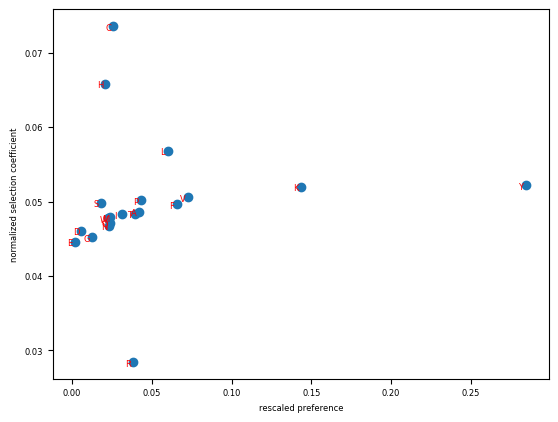

308
0.09174403811795766


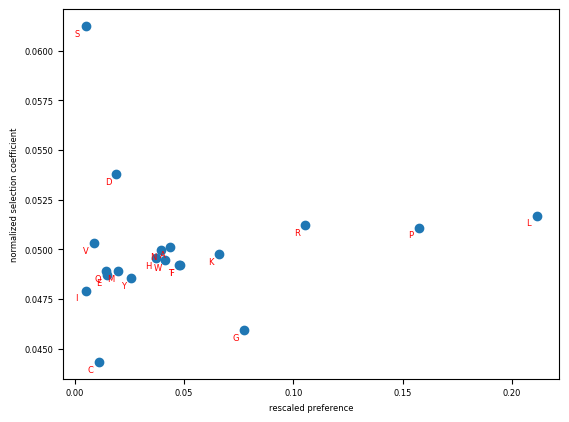

389
0.05684664389633423


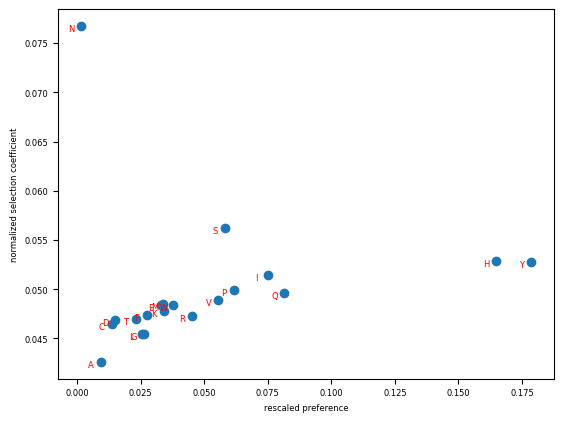

397
0.07571718537895336


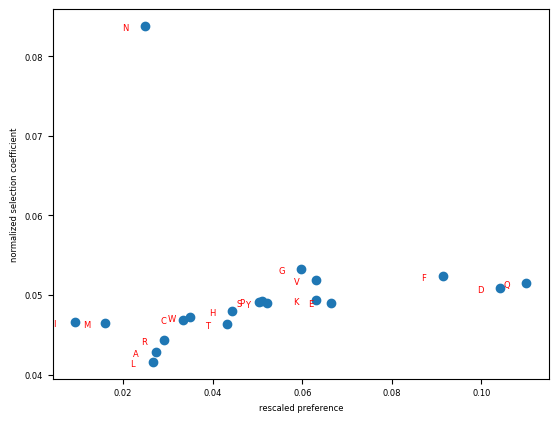

407
0.06254518571667601


In [19]:
full_table = pd.read_csv('full_table.csv')
df = full_table.loc[full_table['replicate']=='3'].dropna()
for site in df['site'].unique():
#     x=st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]
# for site in ['420']:
    x=st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]

    if x<0.1 and x>0.0:
        plt.scatter(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])
        plt.xlabel('rescaled preference')
        plt.ylabel('normalized selection coefficient')
        for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505']):  
            plt.annotate(x,(y-0.005,z-0.0005),c='red')
        plt.show()
        print(site)
        print(st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0])


        

In [184]:
list(full_table['site'].unique()).index('137')

106

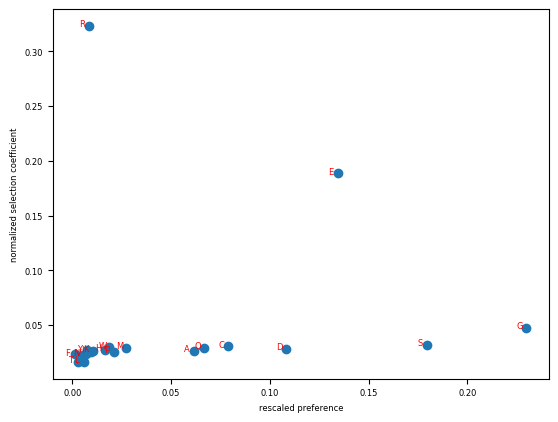

32
Y 0.07967725551509953


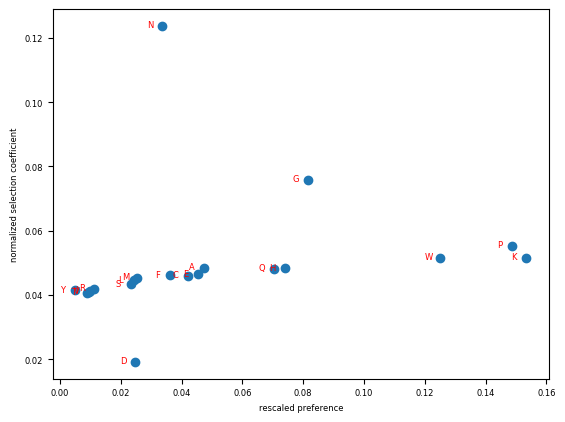

62
Y 0.1981114235796857


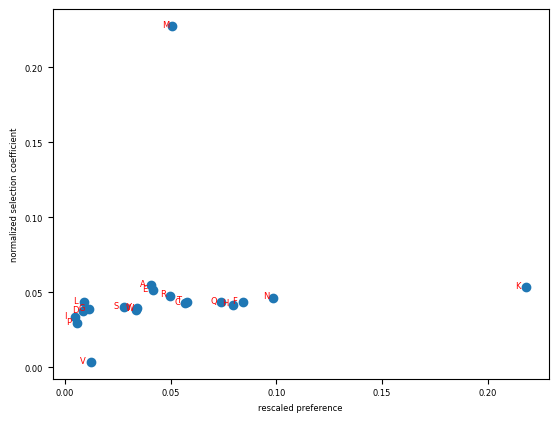

65
Y 0.12491137988448035


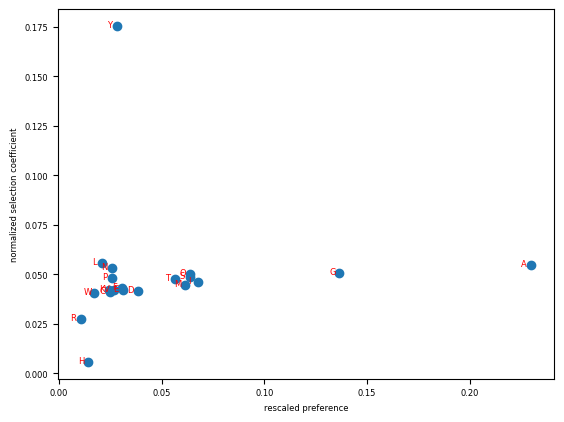

66
Y 0.05245186792717098


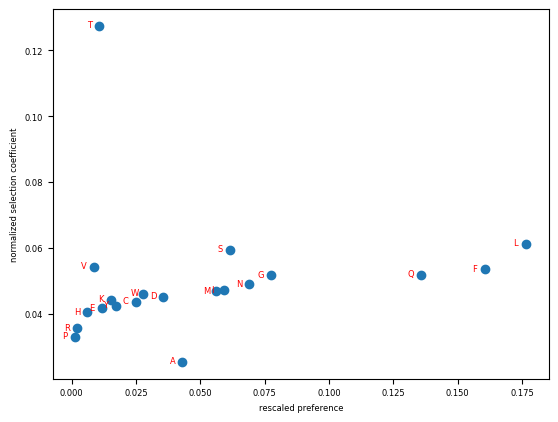

73
Y 0.10219067890416948


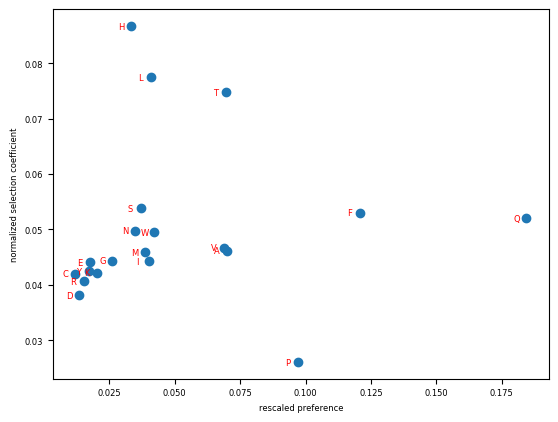

79
Y 0.06740913169409825


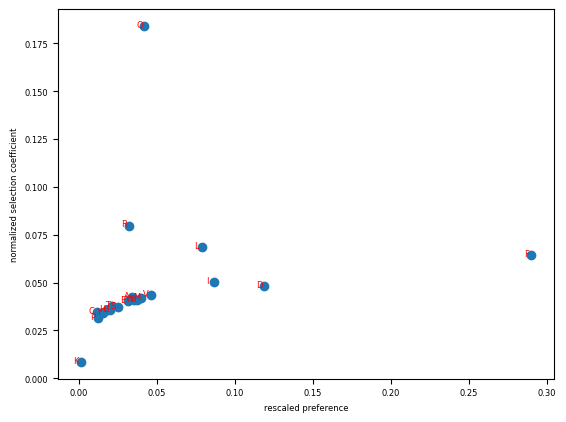

82
Y 0.1994495687594404


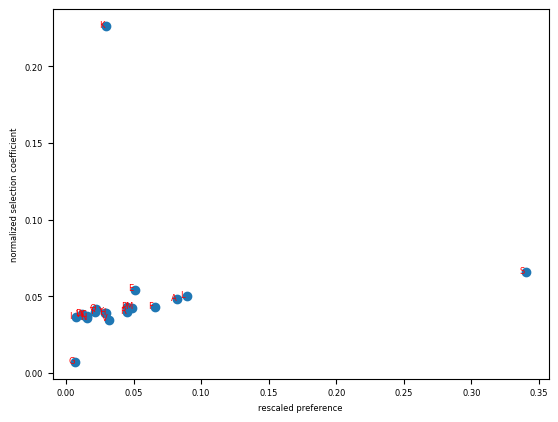

87
Y 0.11017322394444873


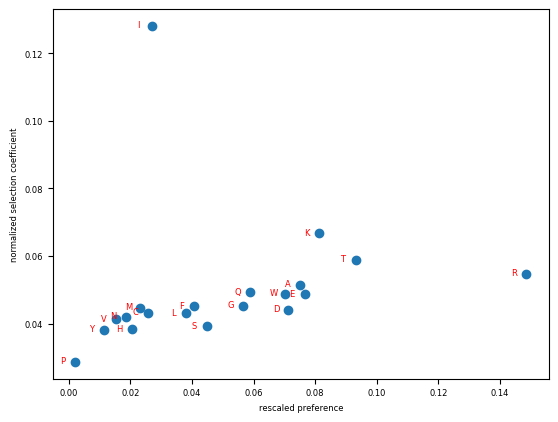

90
Y 0.16783213979924197


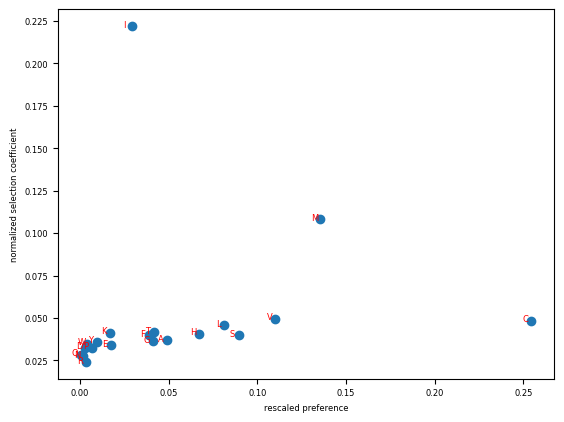

95
Y 0.14906546675592452


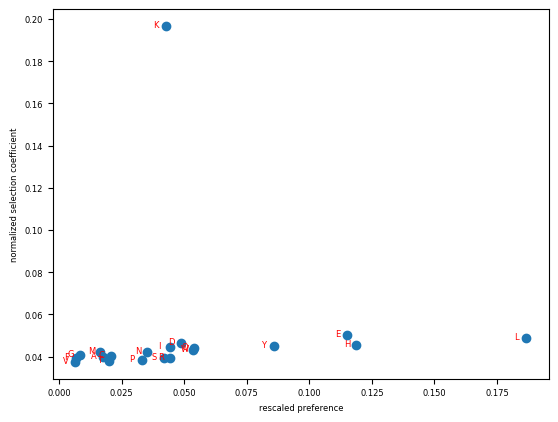

102
Y 0.04535535898692289


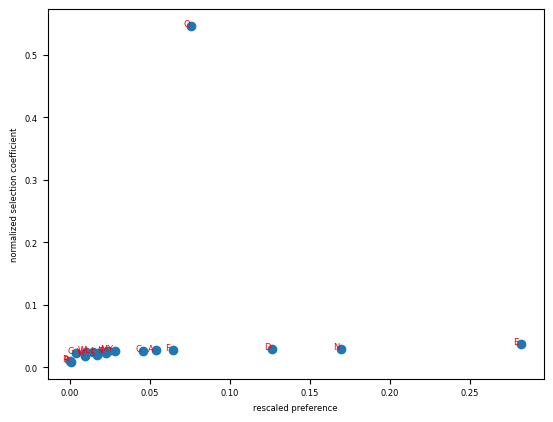

114
Y 0.12601798950738358


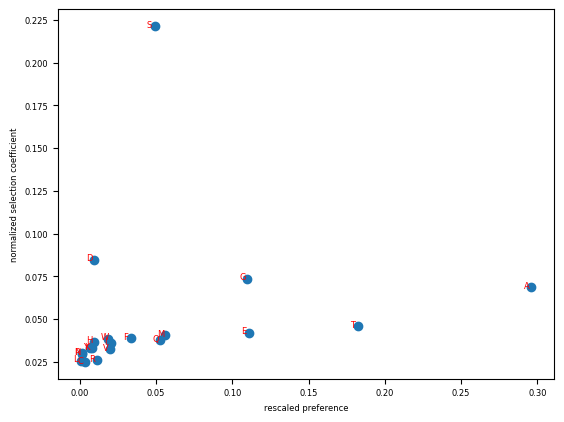

115
Y 0.19338388172046816


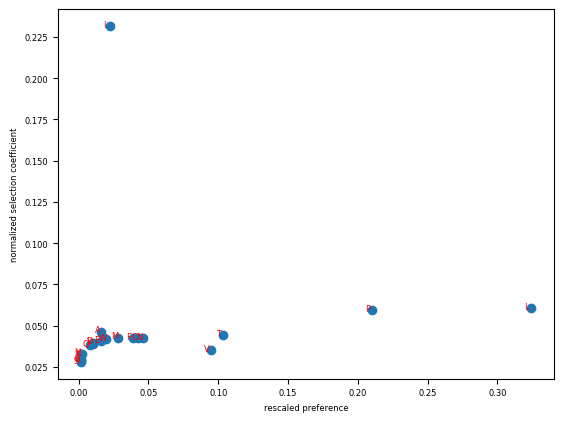

134
Y 0.0809599489019993


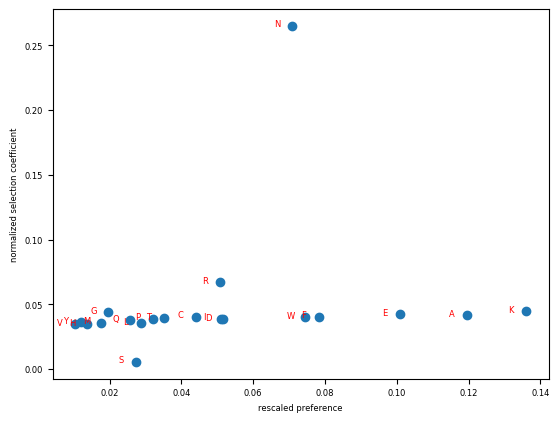

140
Y 0.1934650196187587


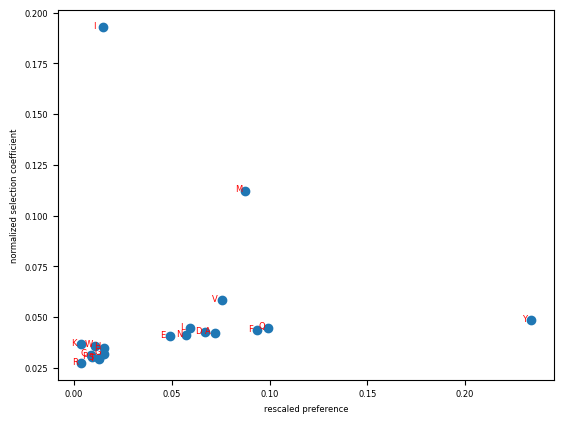

142
Y 0.07134519562581103


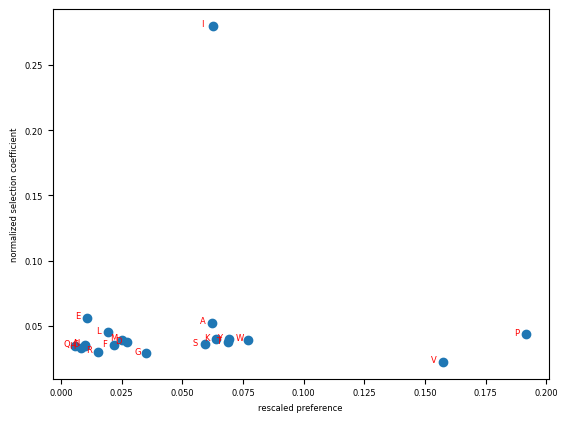

164
Y 0.048097042404529895


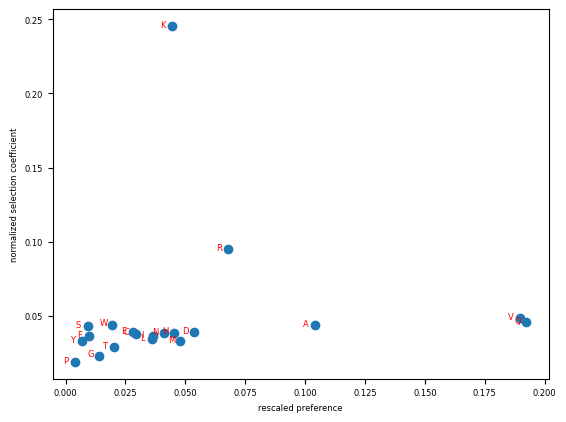

166
Y 0.0893562259934148


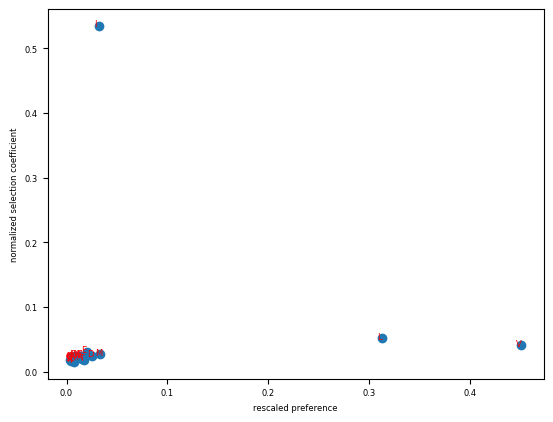

181
Y 0.025192671650711453


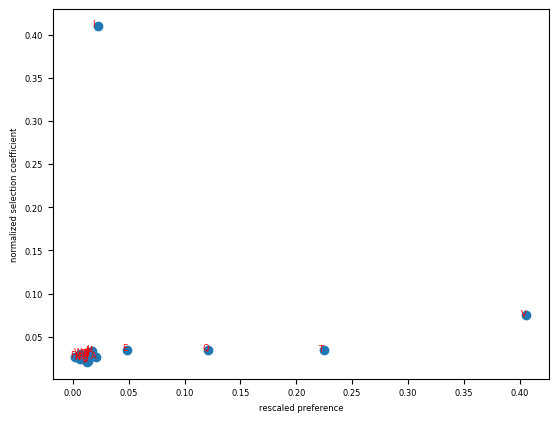

182
Y 0.05009963508896326


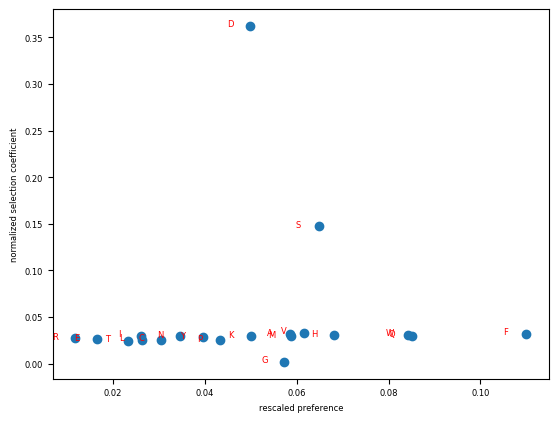

184b
Y 0.06103806927641211


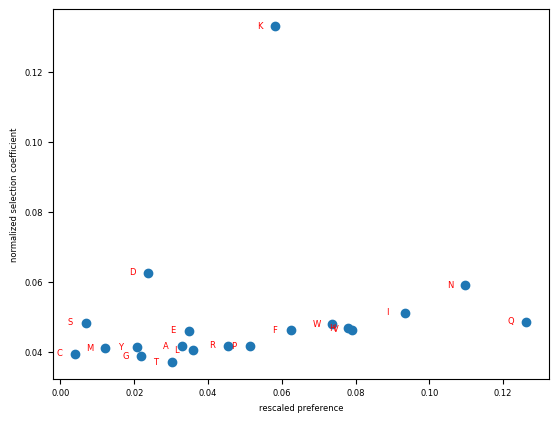

185
Y 0.19468043857107326


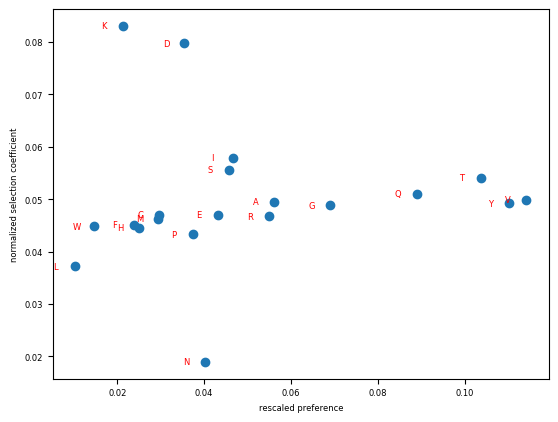

189
Y 0.030731047067915844


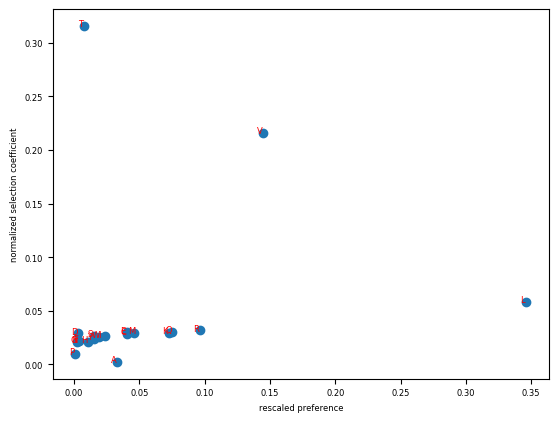

200
Y 0.15398813254306906


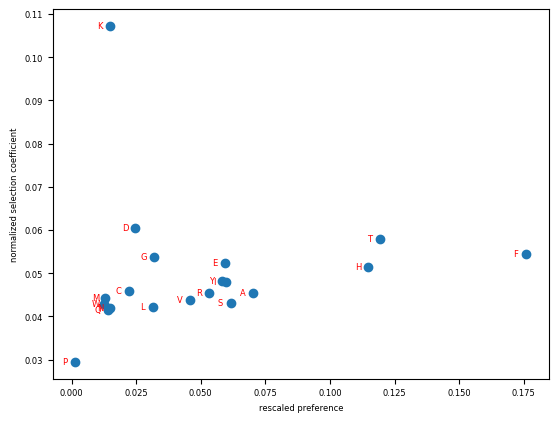

211
Y 0.0789635283428103


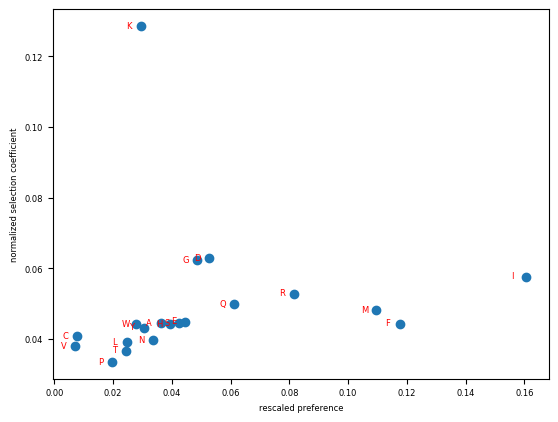

231
Y 0.09961965108346817


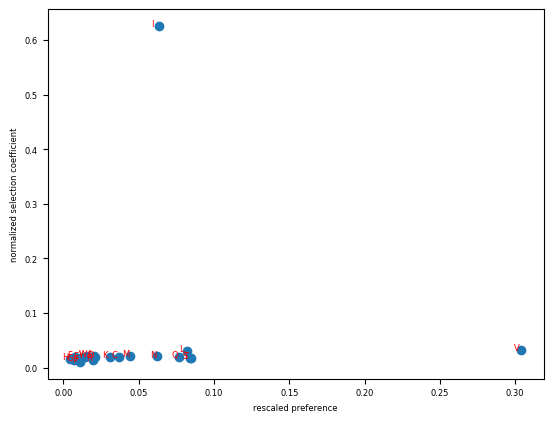

245
Y 0.07154803999825714


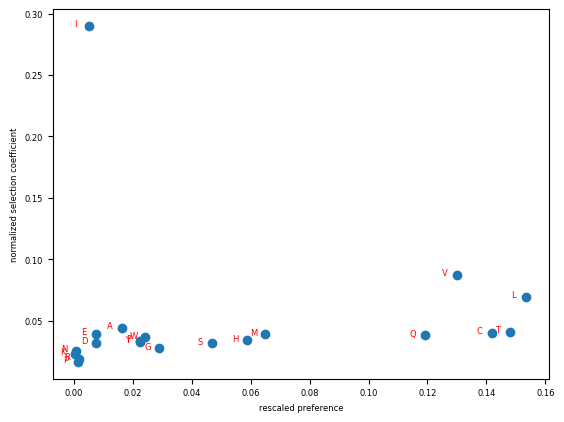

254
Y 0.0029682698602300885


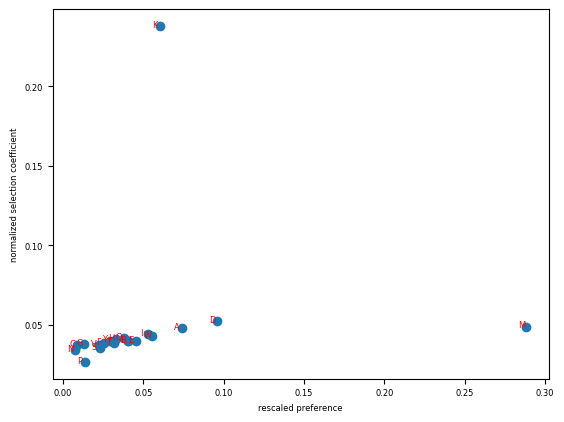

267
Y 0.11938255895054836


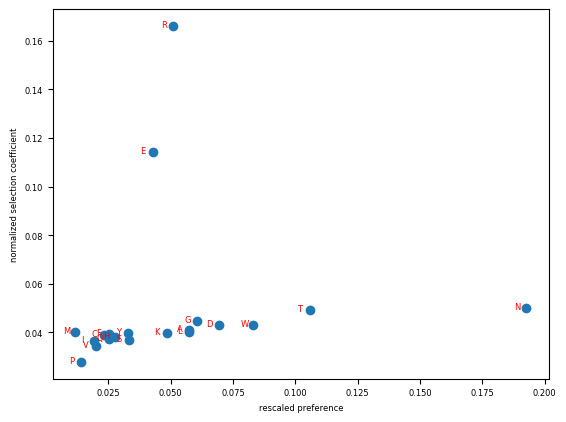

268
Y 0.10555037217523601


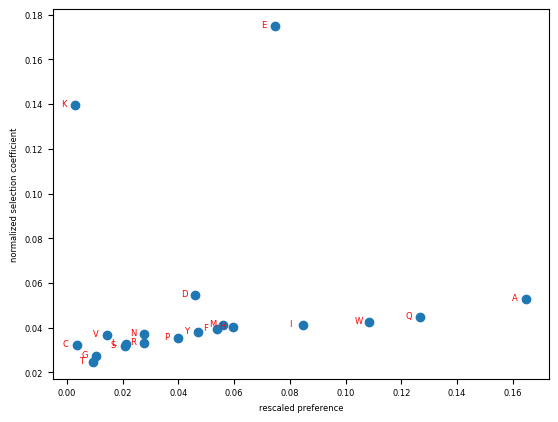

275
Y 0.09422912257071246


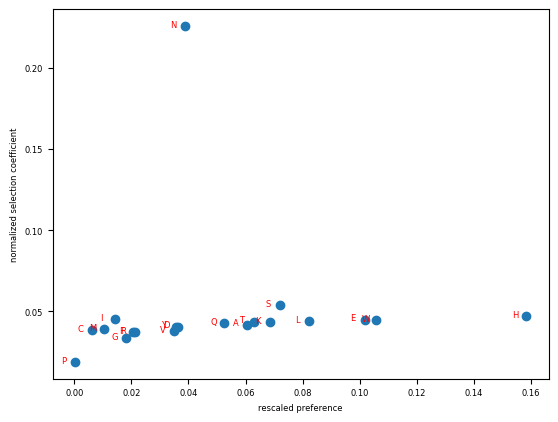

290
Y 0.034303546605954166


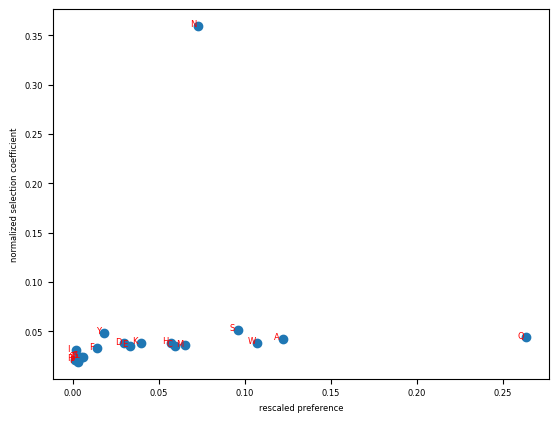

302
Y 0.16095212470431214


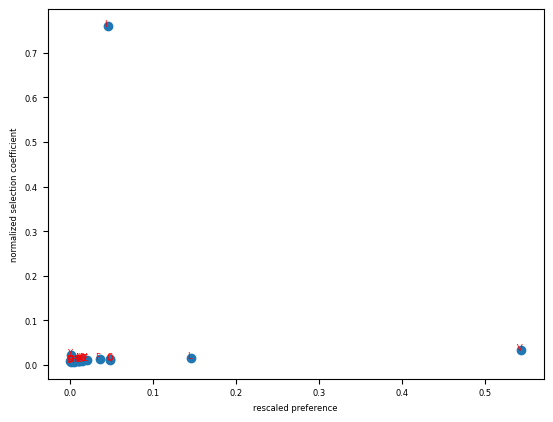

307
Y 0.02376404468560935


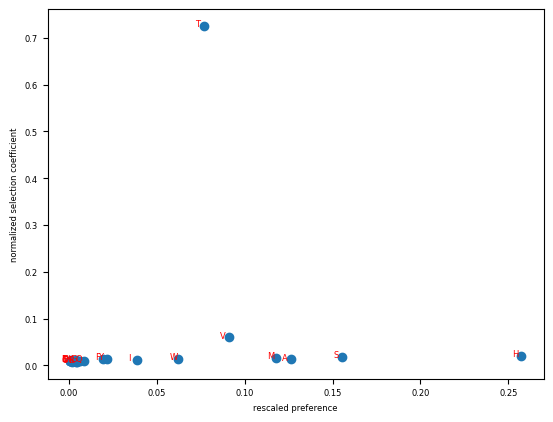

318
Y 0.11853391113713238


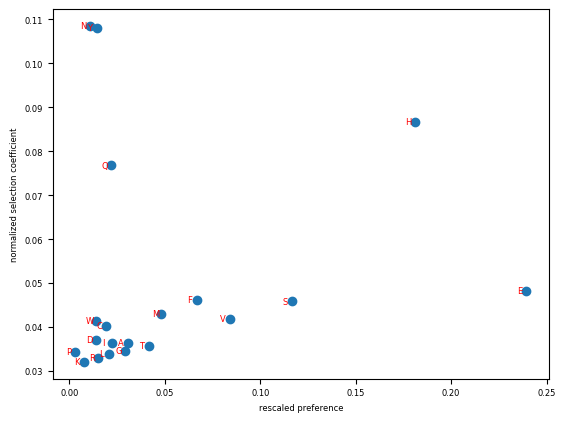

330
Y 0.11957551371559007


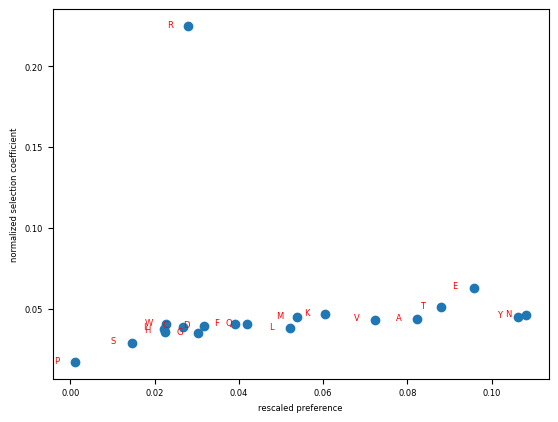

344
Y 0.005498934731375114


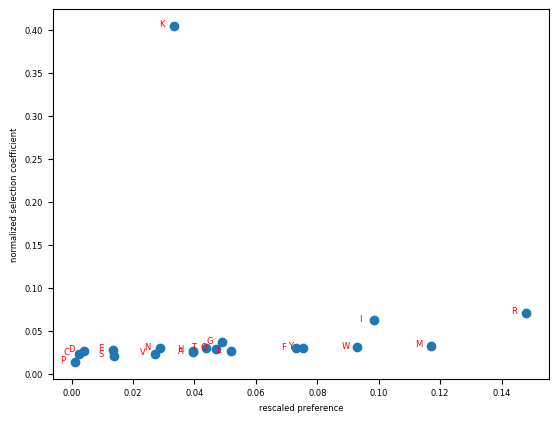

350
Y 0.02336730542386523


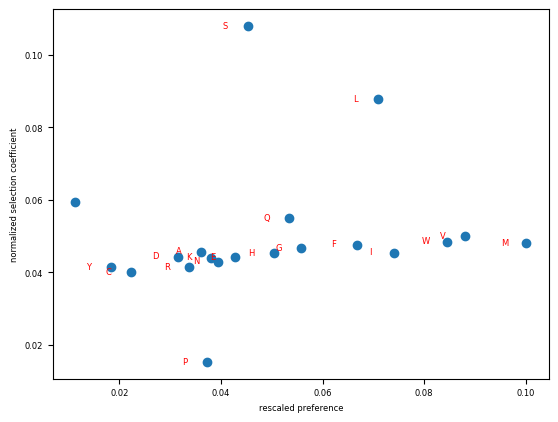

351
Y 0.156214947570163


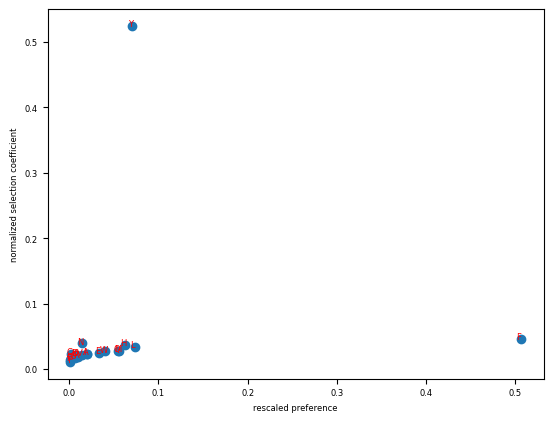

352
Y 0.09664868469696247


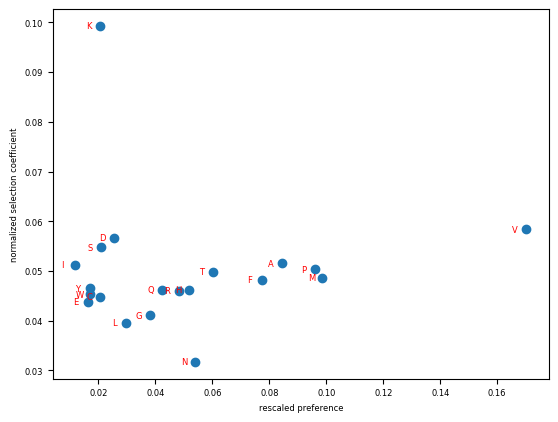

355
Y 0.006925422009418565


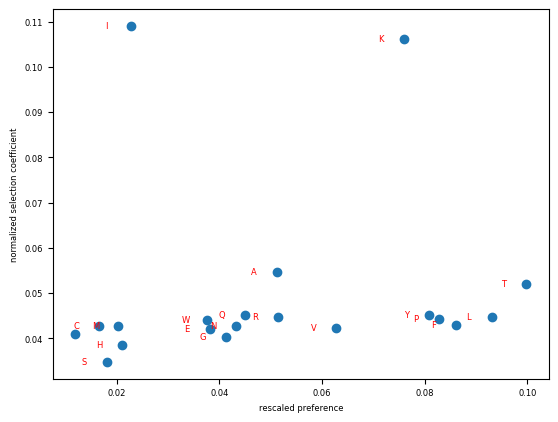

357
Y 0.0914578772245961


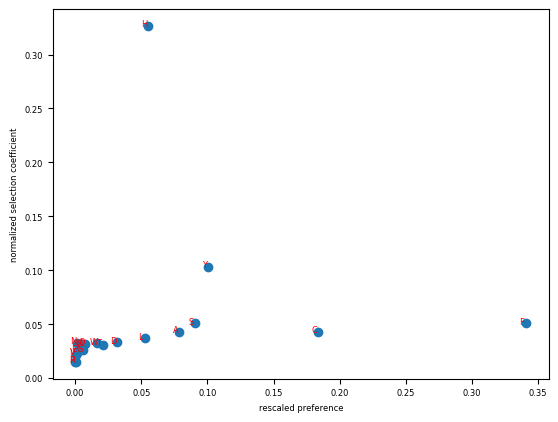

374
Y 0.15372394428407385


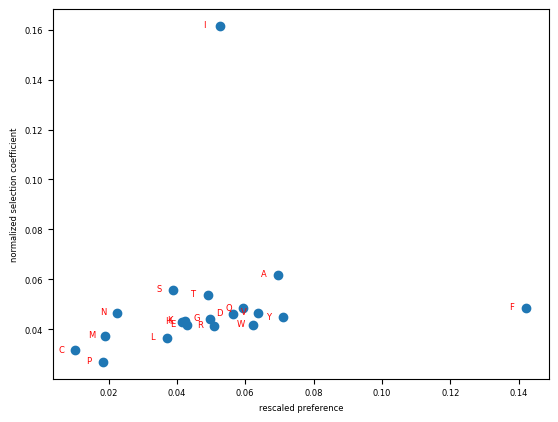

394
Y 0.1600322903407442


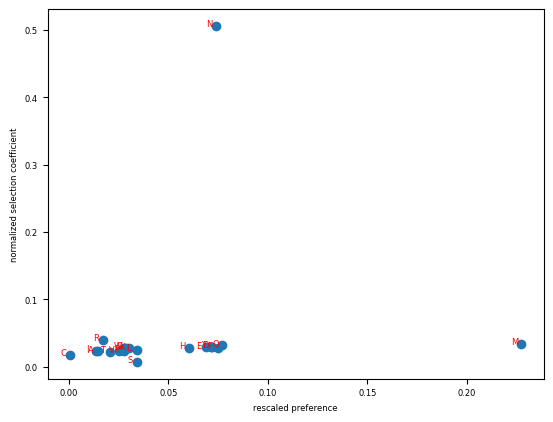

398
Y 0.140270853411919


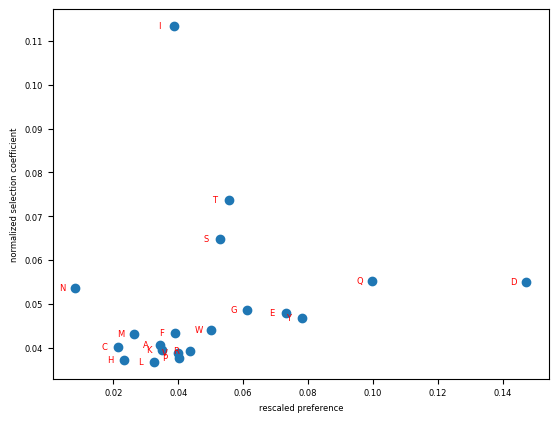

399
Y 0.15161210549746204


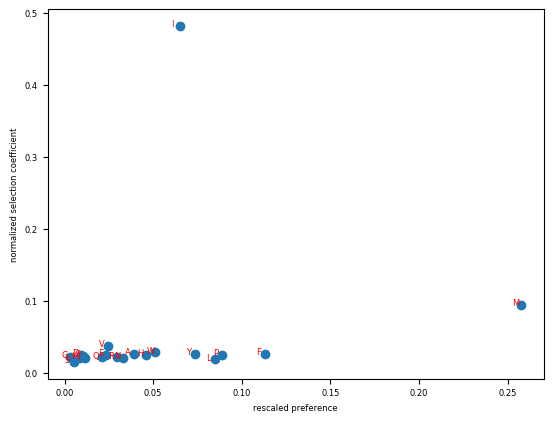

426
Y 0.1942845583744804


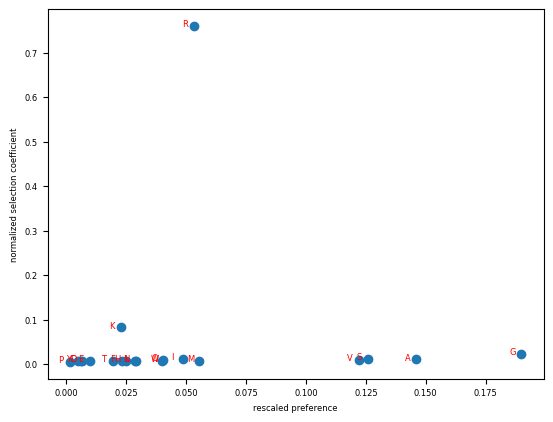

429
Y 0.02195399598107442


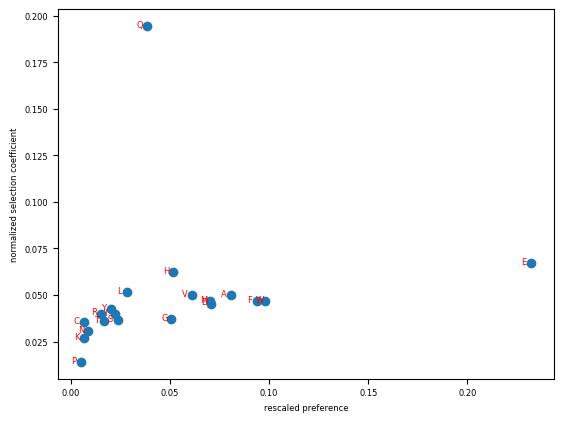

432
Y 0.1861581639508809


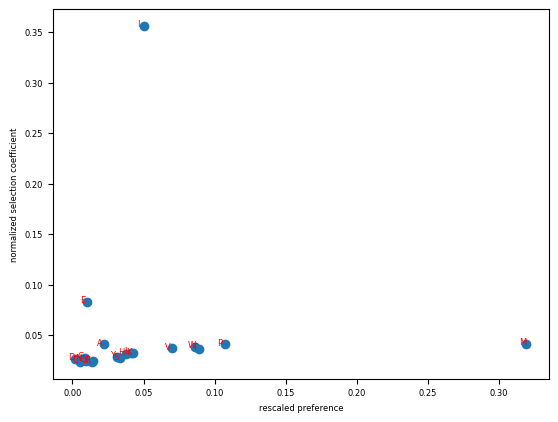

442
Y 0.0360492204791683


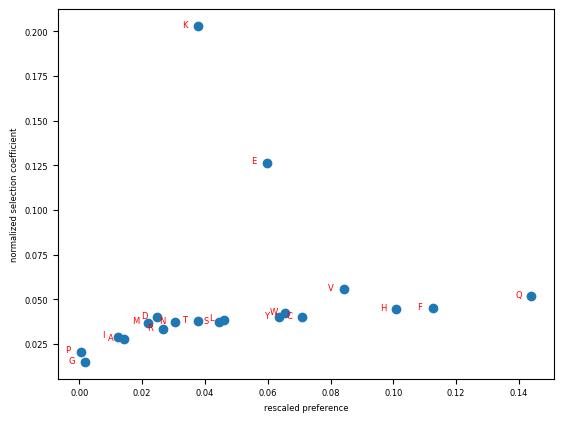

492
Y 0.14448886827287918


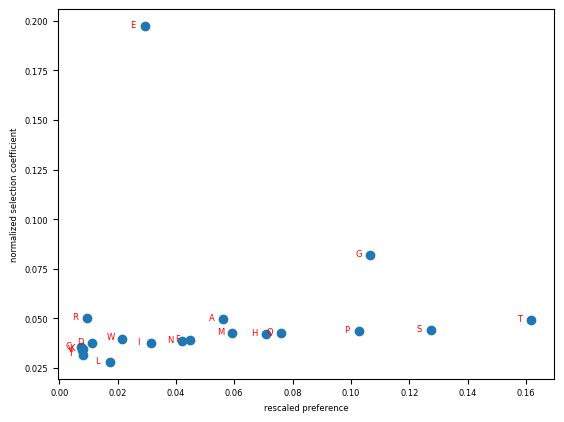

514
Y 0.06342238199277528


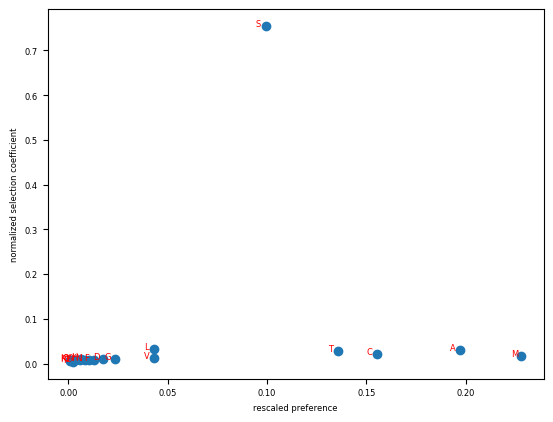

534
Y 0.19730523063421154


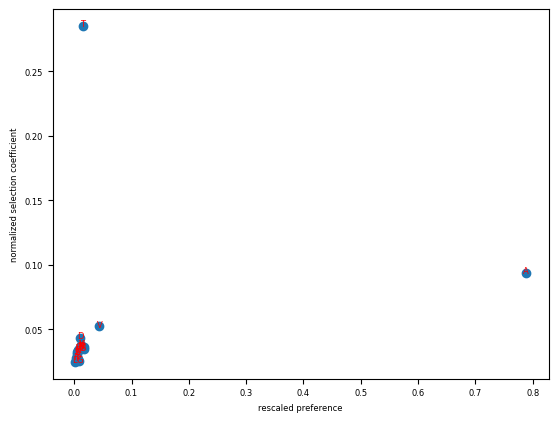

541
Y 0.1895584260987031


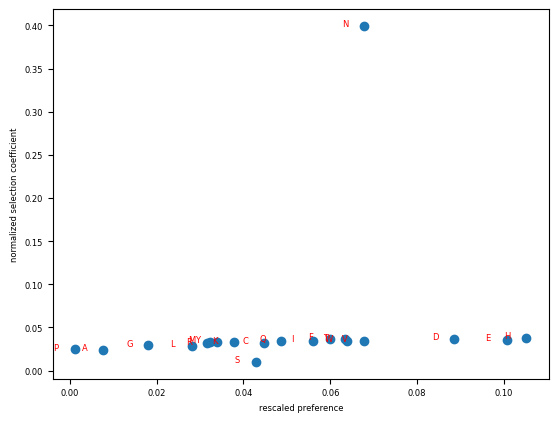

553
Y 0.18916423539894003


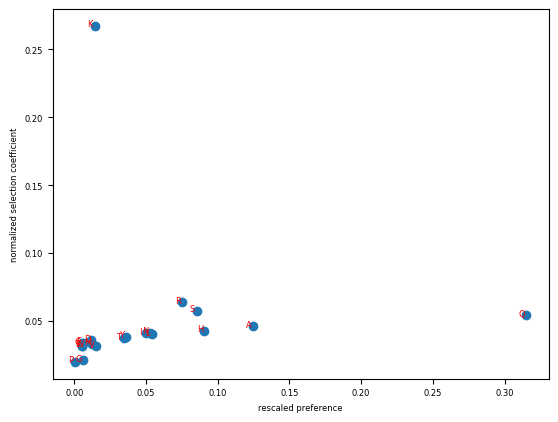

557
Y 0.018881137849461924


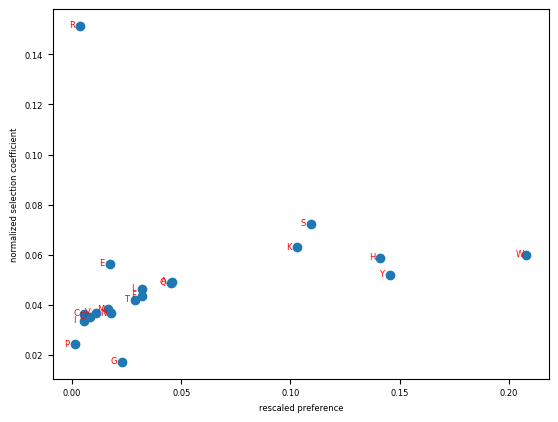

594
Y 0.1790479550165677


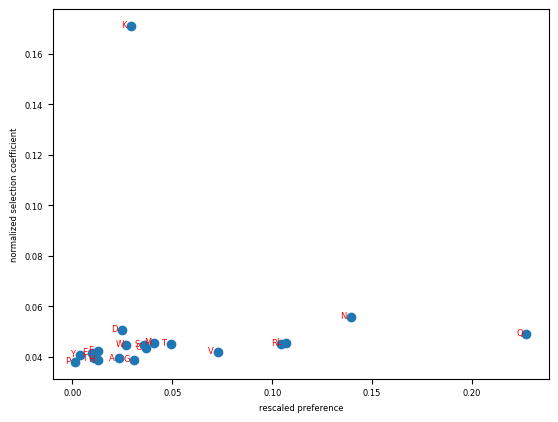

607
Y 0.013471963430967087


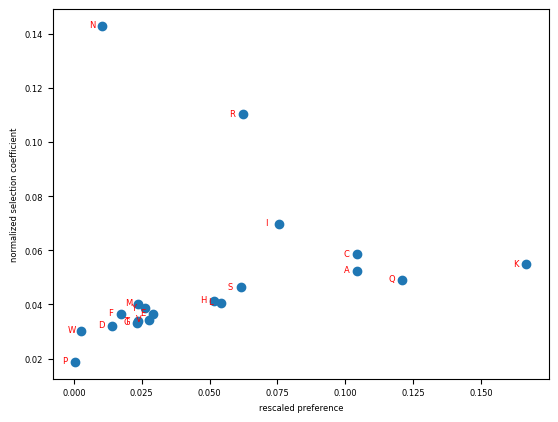

613
Y 0.16930679890493822


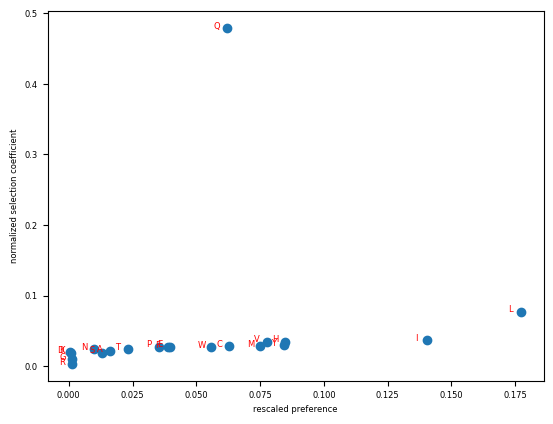

619
Y 0.17984898761110174


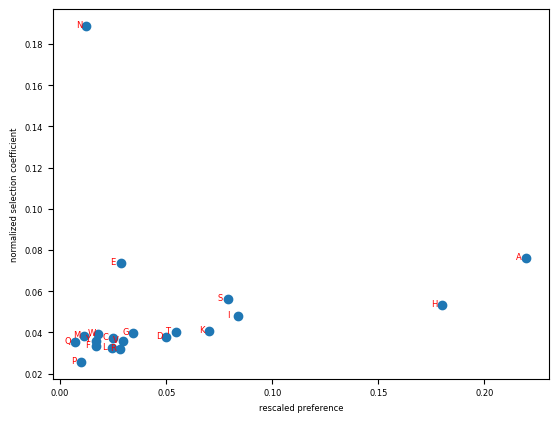

620
Y 0.10621323495337752


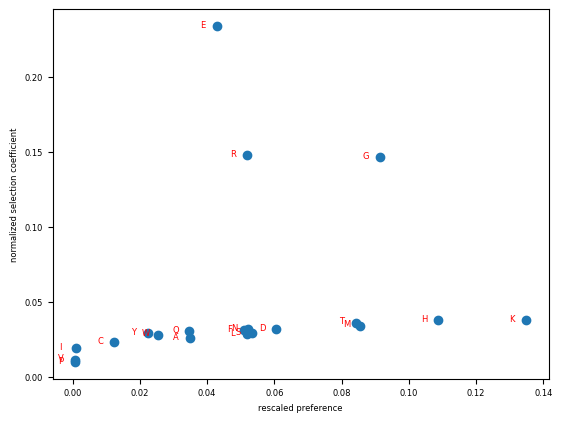

624
Y 0.19807260412422953


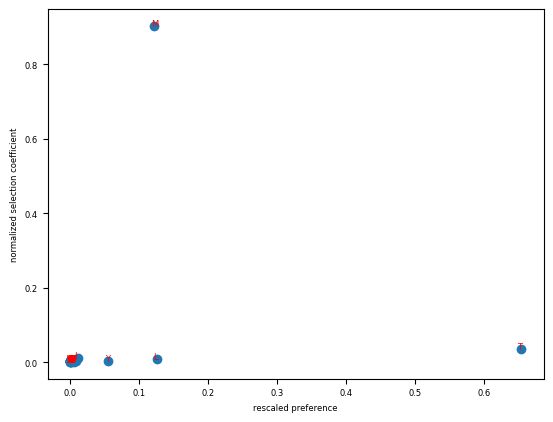

626
Y 0.15312459503330955


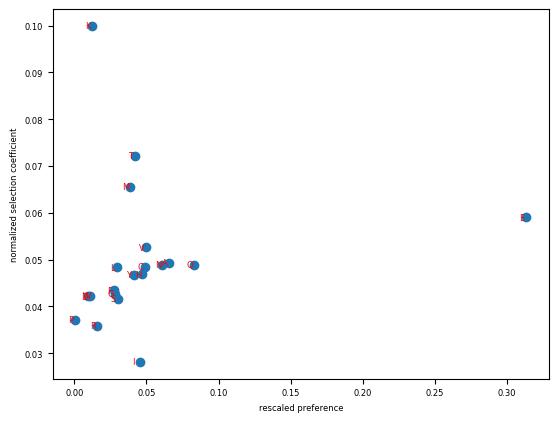

641
Y 0.12985124572512977


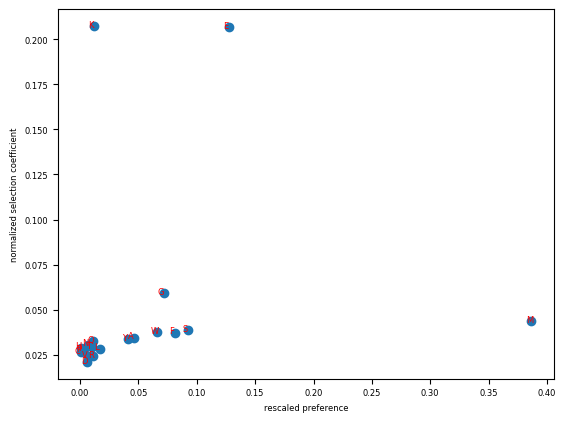

647
Y 0.15666704250207455


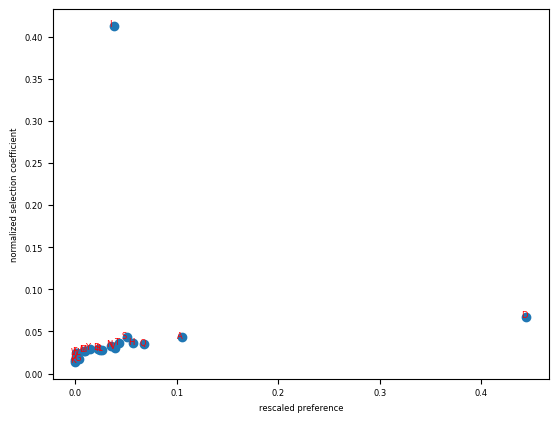

656
Y 0.09040104690234348


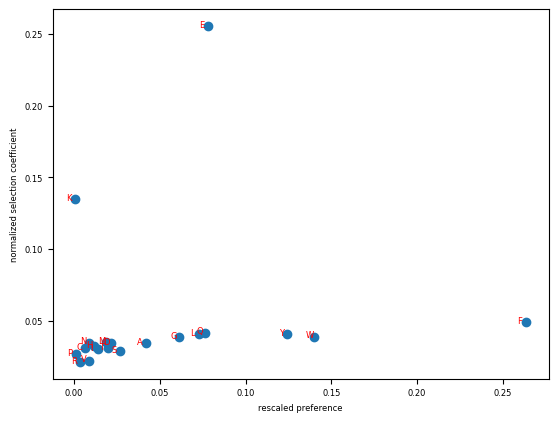

657
Y 0.11641160307586365


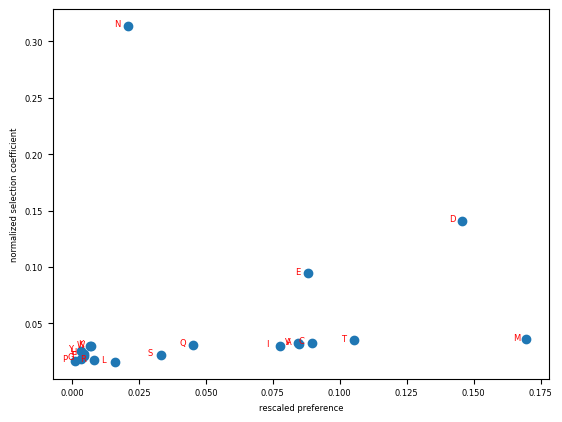

659
Y 0.13761068748389332


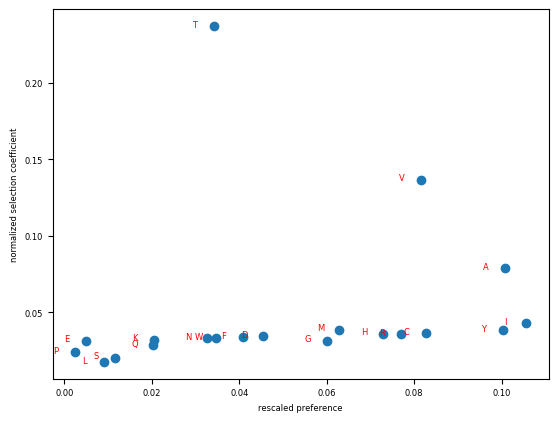

667
Y 0.15887039385887453


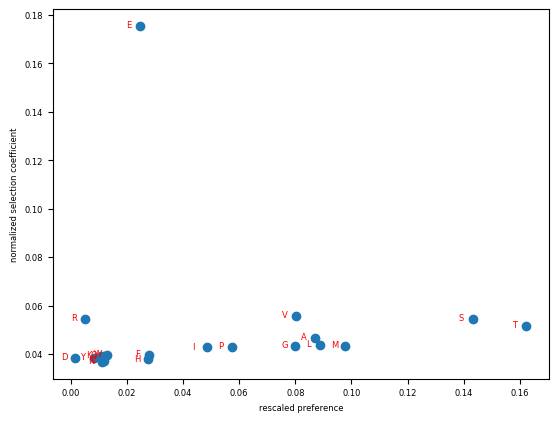

690
Y 0.009296068462961927


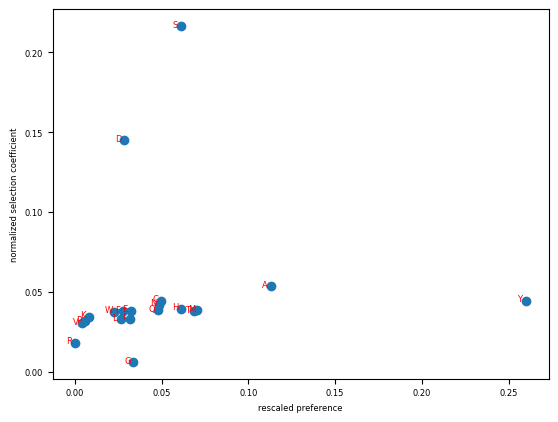

691
Y 0.08971705607226313


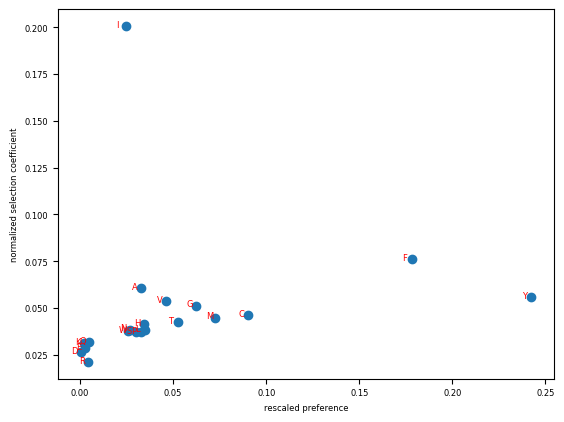

698
Y 0.15459010533920378


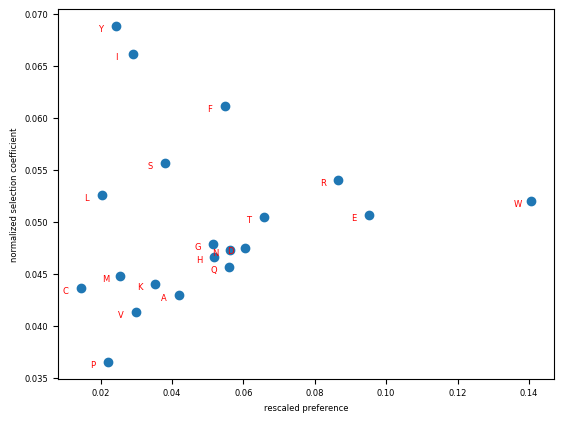

699
Y 0.09117549029104431


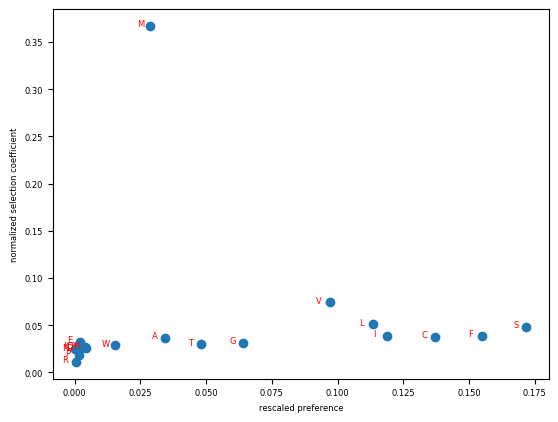

701
Y 0.037729297139342546


'Y'

In [191]:
full_table = pd.read_csv('full_table.csv')
df = full_table.loc[full_table['replicate']=='Average/Joint'].dropna()
for site in df['site'].unique():
#     x=st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]
# for site in ['420']:
    m=st.pearsonr(df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])[0]

    if m<0.2 and m>-0:
        plt.scatter(df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])
        plt.xlabel('rescaled preference')
        plt.ylabel('normalized selection coefficient')
        for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520']):  
            plt.annotate(x,(y-0.005,z-0.0005),c='red')
        plt.show()
        print(site)
        print(x,m)

        
x       

In [28]:
full_table

,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
0,1,31,A,0.052676,0.042503,-0.022959,0.037895,0.089874,0.225027,-0.046952,0.024069
1,1,31,C,0.047946,0.034751,-0.002344,0.046571,0.050234,0.043630,0.000000,0.048676
2,1,31,D,0.037460,0.020493,-0.004790,0.045445,0.055940,0.059097,-0.000000,0.048676
3,1,31,E,0.055839,0.048150,0.009708,0.052536,0.046412,0.034904,0.001368,0.049685
4,1,31,F,0.135655,0.321789,0.011432,0.053449,0.047584,0.037447,0.000000,0.048676
...,...,...,...,...,...,...,...,...,...,...,...
53835,Average/Joint,400,S,NaN,NaN,NaN,NaN,0.046466,0.034676,-0.006652,0.046422
53836,Average/Joint,400,T,NaN,NaN,NaN,NaN,0.046509,0.034766,-0.005905,0.046945
53837,Average/Joint,400,V,NaN,NaN,NaN,NaN,0.041935,0.025964,-0.013666,0.041786
53838,Average/Joint,400,W,NaN,NaN,NaN,NaN,0.050092,0.042860,-0.011664,0.043060


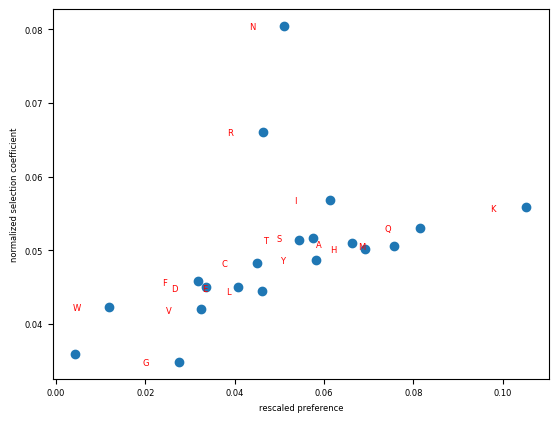

613
Y 0.4766072920361392


'Y'

In [26]:
full_table = pd.read_csv('full_table.csv')
df = full_table.loc[full_table['replicate']=='1'].dropna()
# for site in df['site'].unique():
#     x=st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]
for site in ['613']:
#     m=st.pearsonr(df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])[0]

# #     if m<0.2 and m>-0:
#     plt.scatter(df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])
#     plt.xlabel('rescaled preference')
#     plt.ylabel('normalized selection coefficient')
#     for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520']):  
#         plt.annotate(x,(y-0.008,z-0.0005),c='red')
#     plt.show()
#     print(site)
#     print(x,m)
    m=st.pearsonr(df[df['site']==site]['preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])[0]

#     if m<0.2 and m>-0:
    plt.scatter(df[df['site']==site]['preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])
    plt.xlabel('rescaled preference')
    plt.ylabel('normalized selection coefficient')
    for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520']):  
        plt.annotate(x,(y-0.008,z-0.0005),c='red')
    plt.show()
    print(site)
    print(x,m)


        
x       

In [33]:
df['site']

0         31
1         31
2         31
3         31
4         31
        ... 
13395    702
13396    702
13397    702
13398    702
13399    702
Name: site, Length: 13180, dtype: object

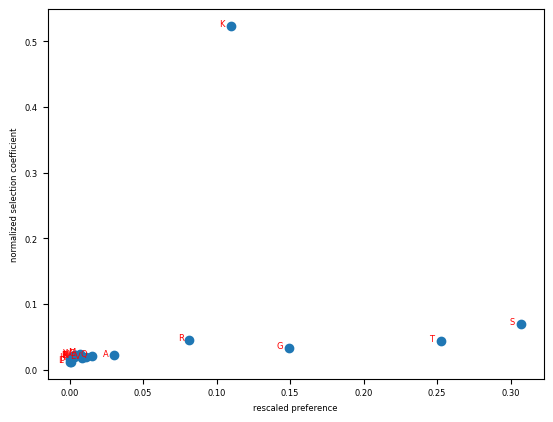

567
Y 0.2654657646540054


'Y'

In [59]:
full_table = pd.read_csv('full_table.csv')
df = full_table.loc[full_table['replicate']=='Average/Joint'].dropna()
# for site in df['site'].unique():
#     x=st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]
for site in ['567']:
    m=st.pearsonr(df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])[0]

#     if m<0.2 and m>-0:
    plt.scatter(df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520'])
    plt.xlabel('rescaled preference')
    plt.ylabel('normalized selection coefficient')
    for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['rescaled_preference_BF520'], df[df['site']==site]['normalized_selection_coefficient_BF520']):  
        plt.annotate(x,(y-0.008,z-0.0005),c='red')
    plt.show()
    print(site)
    print(x,m)


        
x       

In [35]:
def codon2aa(c, noq=False):              # Returns the amino acid character corresponding to the input codon.
        
    if c[0]=='-' and c[1]=='-' and c[2]=='-': return '-'        # If all nucleotides are missing, return gap
    
    elif c[0]=='-' or c[1]=='-' or c[2]=='-':                   # Else if some nucleotides are missing, return '?'
        if noq: return '-'
        else:   return '?'
   
    # If the first or second nucleotide is ambiguous, AA cannot be determined, return 'X'
    elif c[0] in ['W', 'S', 'M', 'K', 'R', 'Y'] or c[1] in ['W', 'S', 'M', 'K', 'R', 'Y']: return 'X'     
                                                    
    elif c[0]=='T':                                             # Else go to tree
        if c[1]=='T':
            if    c[2] in ['T', 'C', 'Y']: return 'F'
            elif  c[2] in ['A', 'G', 'R']: return 'L'
            else:                          return 'X'
        elif c[1]=='C':                    return 'S'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'Y'
            elif  c[2] in ['A', 'G', 'R']: return '*'
            else:                          return 'X'
        elif c[1]=='G':
            if    c[2] in ['T', 'C', 'Y']: return 'C'
            elif  c[2]=='A':               return '*'
            elif  c[2]=='G':               return 'W'
            else:                          return 'X'
        else:                              return 'X'
        
    elif c[0]=='C':
        if   c[1]=='T':                    return 'L'
        elif c[1]=='C':                    return 'P'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'H'
            elif  c[2] in ['A', 'G', 'R']: return 'Q'
            else:                          return 'X'
        elif c[1]=='G':                    return 'R'
        else:                              return 'X'
        
    elif c[0]=='A':
        if c[1]=='T':
            if    c[2] in ['T', 'C', 'Y']: return 'I'
            elif  c[2] in ['A', 'M', 'W']: return 'I'
            elif  c[2]=='G':               return 'M'
            else:                          return 'X'
        elif c[1]=='C':                    return 'T'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'N'
            elif  c[2] in ['A', 'G', 'R']: return 'K'
            else:                          return 'X'
        elif c[1]=='G':
            if    c[2] in ['T', 'C', 'Y']: return 'S'
            elif  c[2] in ['A', 'G', 'R']: return 'R'
            else:                          return 'X'
        else:                              return 'X'
        
    elif c[0]=='G':
        if   c[1]=='T':                    return 'V'
        elif c[1]=='C':                    return 'A'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'D'
            elif  c[2] in ['A', 'G', 'R']: return 'E'
            else:                          return 'X'
        elif c[1]=='G':                    return 'G'
        else:                              return 'X'

    else:                                  return 'X'


In [133]:
count_0.loc[count_0['site']==139]
count_0.iloc[109]

site        139
wildtype    GAT
AAA           5
AAC           3
AAG           7
           ... 
TGT           0
TTA           5
TTC           4
TTG           6
TTT           0
Name: 109, Length: 66, dtype: object

N 2.9595839877931587
I -0.875115161795021
S -0.15462571061244956
T -0.43801822807759433
A 0.8316442936730257


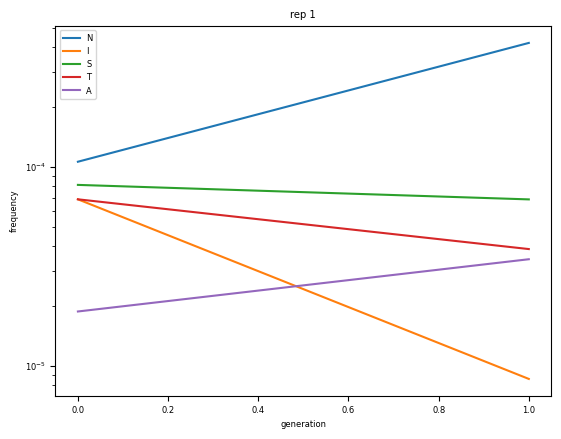

In [124]:
site=109
AA_list=['N','I','S','T','A']


count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-3_codoncounts.csv')

for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
 

In [53]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')

wildtype_list = count_0['wildtype'].tolist()
site_list = count_0['site'].tolist()
[(codon2aa(i),j) for i,j in zip(wildtype_list,site_list)][572]

# df['site'].unique()

('S', 602)

In [207]:
count_0[count_0['site']==602]

,site,wildtype,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
572,602,AGT,17,33,12,18,22,32,23,20,...,19,10,20,27,33,24,11,14,10,26


In [47]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-2_codoncounts.csv')
site=602
AA_list=['Y','L','M','P']
# AA_list = ['L','F','Q','T','S']
AA_list = ['R','S','K','H','W','Y']
AA_list = ['N','R','I','C','Q','K','A']

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
#     plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
 

NameError: name 'aa2codon' is not defined

In [52]:
count_0['site'].unique()

array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

N 2.537594401890432
R 0.6061024310968489
I 0.6409123328956559
C -0.028407171311782737
Q 0.39510765144974774
K 1.1198388989561106
A 0.17400800133159583


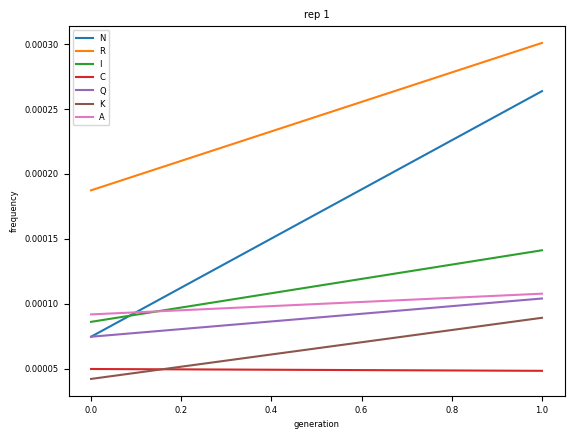

N 2.398235957151354
R 1.032823637215744
I 1.4582983519818302
C 1.082459730466295
Q 0.23288898078601936
K 0.8783689000743519
A 0.19017339789193857


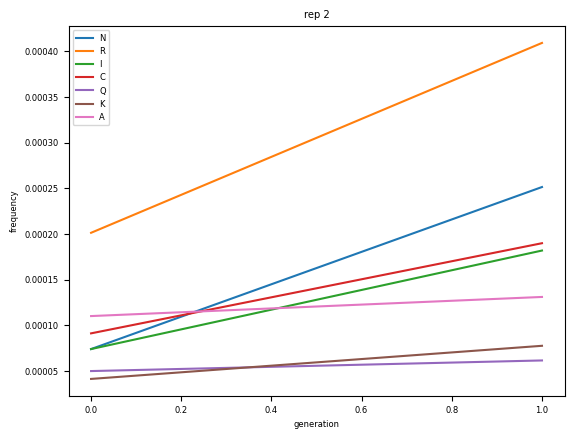

N 1.3780737722078567
R 0.2357009752189506
I 0.16617079214039127
C 0.14147541065977118
Q 0.0780601100675619
K 0.0037111369594540426
A 0.2613303287790473


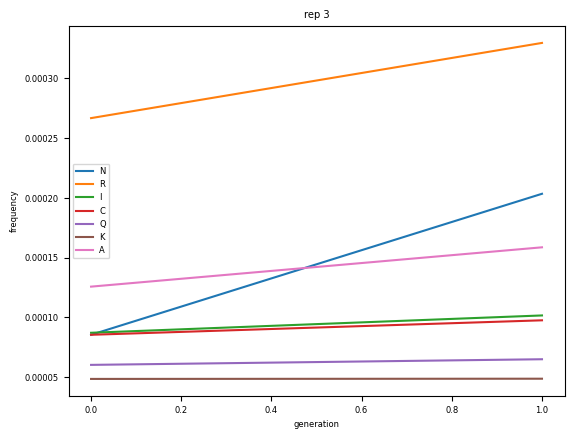

In [54]:


site=553
site=572
AA_list=['Y','L','M','P']
# AA_list = ['L','F','Q','T','S']
AA_list = ['R','S','K','H','W','Y']
AA_list = ['N','R','I','C','Q','K','A']
# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')

for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
#     plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()

count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-2_codoncounts.csv')

for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
#     plt.yscale('log')
    plt.legend()
    plt.title('rep 2')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
 
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-3_codoncounts.csv')

for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
#     plt.yscale('log')
    plt.legend()
    plt.title('rep 3')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
 

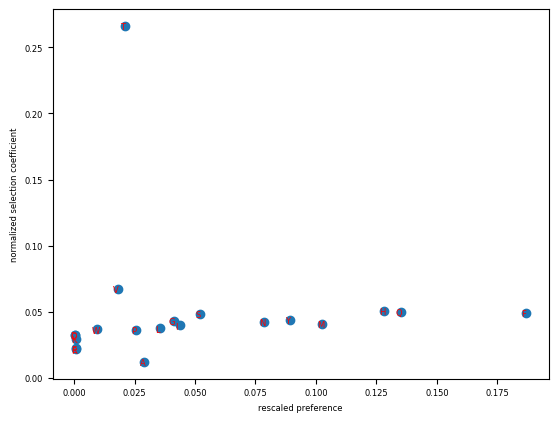

60
-0.006457168476667529


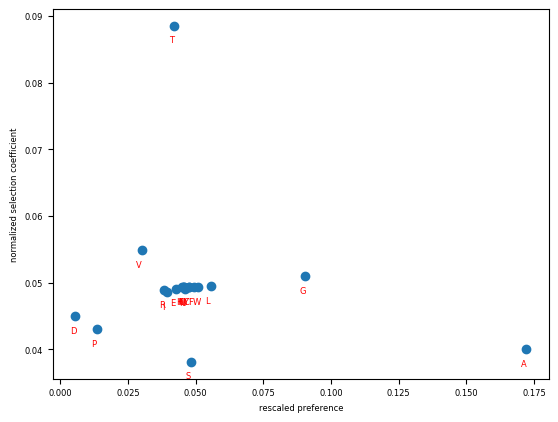

73
-0.16561380307053655


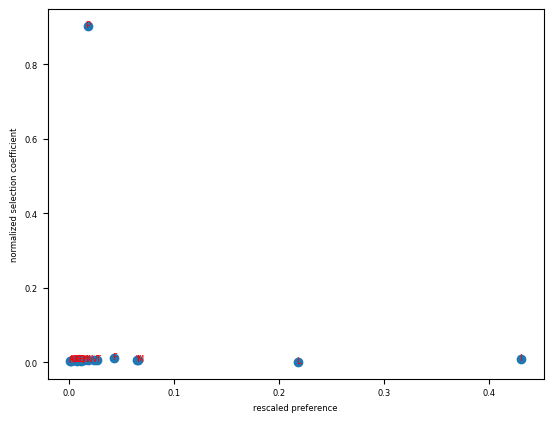

175
-0.07201303067541116


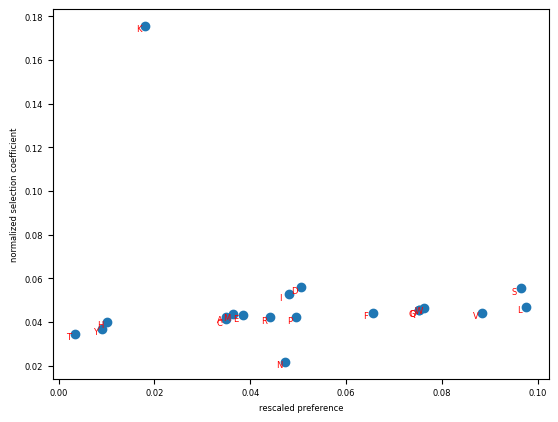

186
-0.14184781502101926


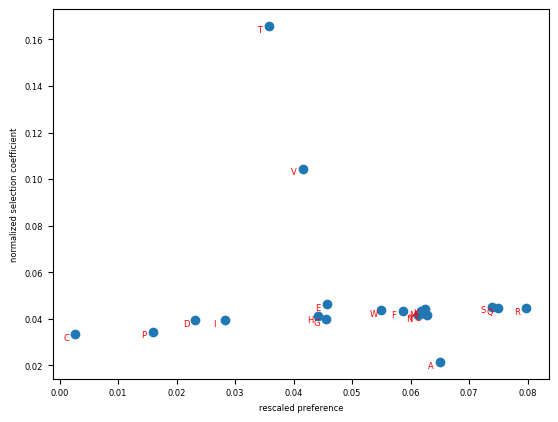

336
-0.12713796964938978


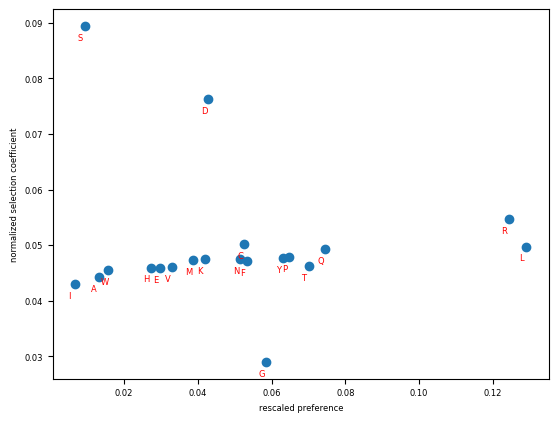

389
-0.10787763590297679


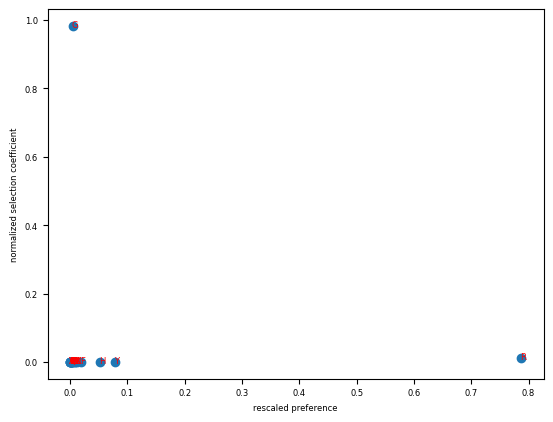

511
-0.048221291383277194


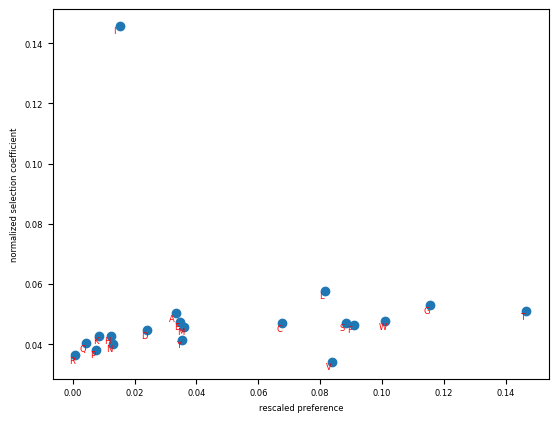

689
-0.045648260960646996


In [382]:
full_table = pd.read_csv('full_table.csv')
df = full_table.loc[full_table['replicate']=='Average/Joint'].dropna()
for site in df['site'].unique():
# for site in ['644']:
    if st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]<-0:
        plt.scatter(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])
        plt.xlabel('rescaled preference')
        plt.ylabel('normalized selection coefficient')
        for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505']):  
            plt.annotate(x,(y-0.002,z-0.0025),c='red')
        plt.show()
        print(site)
        print(st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0])

        
        

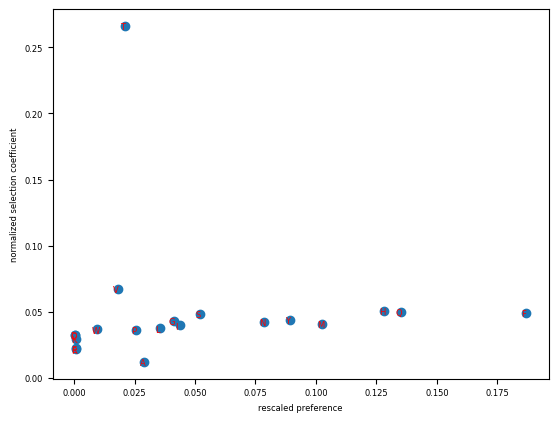

60
-0.006457168476667529


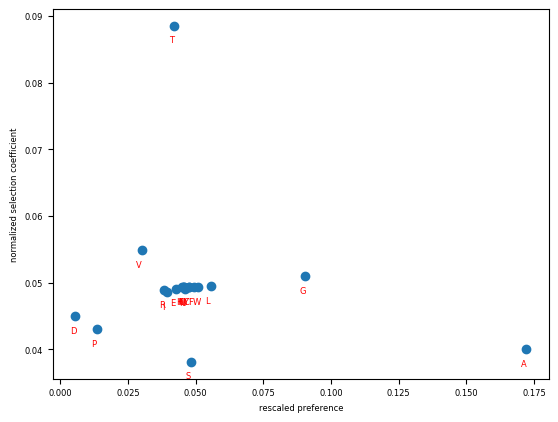

73
-0.16561380307053655


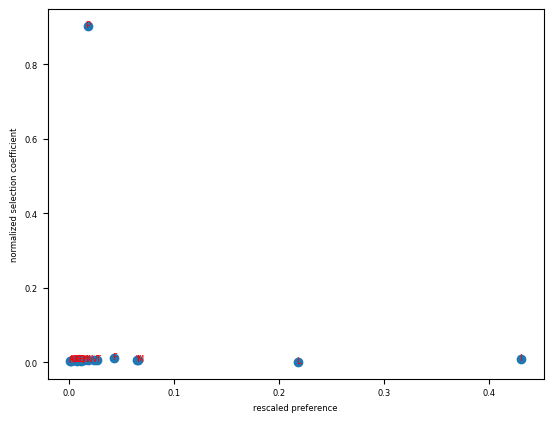

175
-0.07201303067541116


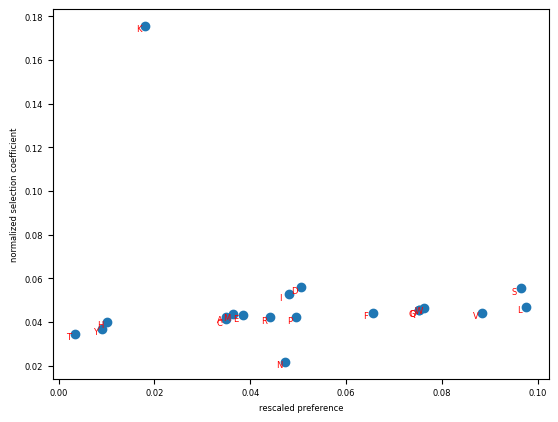

186
-0.14184781502101926


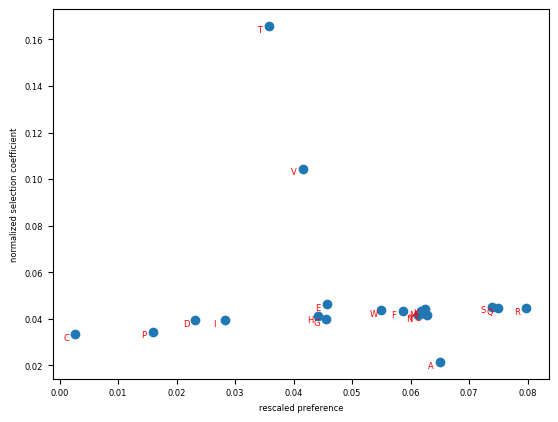

336
-0.12713796964938978


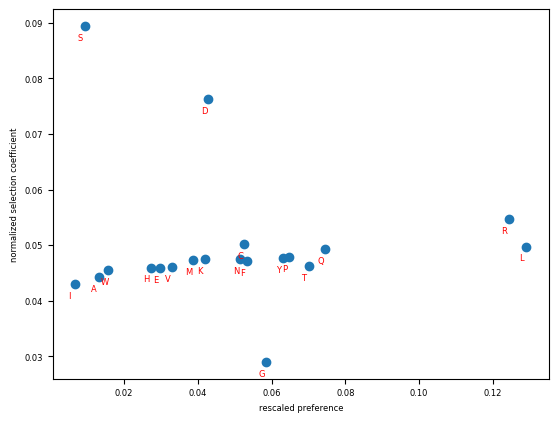

389
-0.10787763590297679


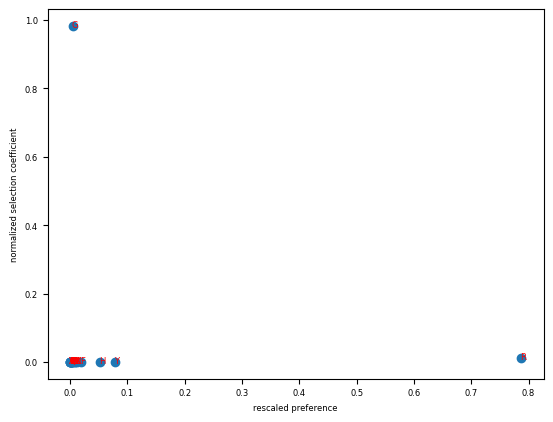

511
-0.048221291383277194


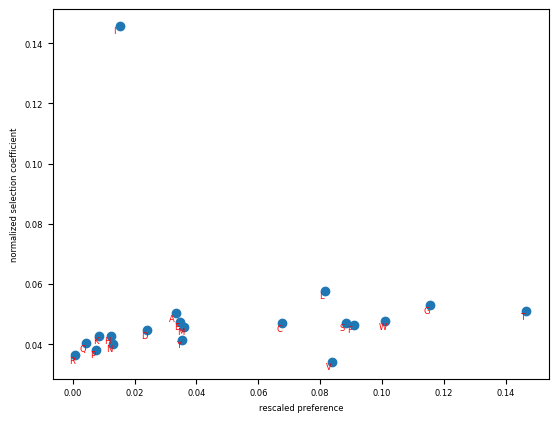

689
-0.045648260960646996


In [382]:
full_table = pd.read_csv('full_table.csv')
df = full_table.loc[full_table['replicate']=='Average/Joint'].dropna()
for site in df['site'].unique():
# for site in ['644']:
    if st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0]<-0:
        plt.scatter(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])
        plt.xlabel('rescaled preference')
        plt.ylabel('normalized selection coefficient')
        for x,y,z in zip(df[df['site']==site]['amino_acid'],df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505']):  
            plt.annotate(x,(y-0.002,z-0.0025),c='red')
        plt.show()
        print(site)
        print(st.pearsonr(df[df['site']==site]['rescaled_preference_BG505'], df[df['site']==site]['normalized_selection_coefficient_BG505'])[0])

        
        

In [330]:
full_table

,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
0,1,31,A,0.052676,0.042503,-0.022959,0.037895,0.089874,0.225027,-0.046952,0.024069
1,1,31,C,0.047946,0.034751,-0.002344,0.046571,0.050234,0.043630,0.000000,0.048676
2,1,31,D,0.037460,0.020493,-0.004790,0.045445,0.055940,0.059097,-0.000000,0.048676
3,1,31,E,0.055839,0.048150,0.009708,0.052536,0.046412,0.034904,0.001368,0.049685
4,1,31,F,0.135655,0.321789,0.011432,0.053449,0.047584,0.037447,0.000000,0.048676
...,...,...,...,...,...,...,...,...,...,...,...
53835,Average/Joint,400,S,NaN,NaN,NaN,NaN,0.046466,0.034676,-0.006652,0.046422
53836,Average/Joint,400,T,NaN,NaN,NaN,NaN,0.046509,0.034766,-0.005905,0.046945
53837,Average/Joint,400,V,NaN,NaN,NaN,NaN,0.041935,0.025964,-0.013666,0.041786
53838,Average/Joint,400,W,NaN,NaN,NaN,NaN,0.050092,0.042860,-0.011664,0.043060


In [355]:
def err_correct(df_0):

#     df_0 = pd.read_csv('%s/%s/%s' % (DMS_DIR, DATA_DIR, DNACODON), comment = '#', memory_map = True)     # Read raw data file

    r    = len(CODONS)              # How many codon 
    L    = len(df_0)                # How long the sequence is
    err  = np.zeros((L, r))         # Error matrix record
    q    = len(AA)                  # How many amino acid

    # Get wildtype sequence
    wt = []
    for i in range(L):
        wt.append(str(df_0.iloc[i].wildtype))

    # Get the total number of reads for each site
    norm_0 = np.zeros(L)
    for i in range(L):
        norm_0[i] = df_0[CODONS].sum(axis=1).tolist()[i]

    #norm_0 = np.zeros(L)
    #for c in CODONS:
    #    for i in range(L):
    #        norm_0[i] += df_0.iloc[i][c]
         

    # Compute error probability
    for i in range(L):
        err[i] = df_0.iloc[i][CODONS].tolist()/norm_0[i]       
        wild_type_index = CODONS.index(wt[i])       
        err[i][wild_type_index] = norm_0[i]/df_0.iloc[i][CODONS].tolist()[wild_type_index]

    #for c in CODONS:
    #    for i in range(L):
    #        if c == wt[i]:
    #            err[i][CODONS.index(c)] = norm_0[i]/df_0.iloc[i][c]
    #        else:
    #            err[i][CODONS.index(c)] = df_0.iloc[i][c]/norm_0[i]	

    return err


CODONS = ['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT',   # Tri-nucleotide units table
          'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT',
          'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT',
          'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT',
          'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT',
          'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT',
          'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT',
          'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']  

df_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-1_codoncounts.csv')
df_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')
q    = len(AA)
L    = len(df_0)
size=q*L
x_0  = np.zeros(size)
x_1  = np.zeros(size)
err = err_correct(df_0)
# Get wildtype sequence
wt = []
for i in range(L):
    wt.append(str(df_0.iloc[i].wildtype))
print("Correcting reads and computing allele frequency difference and mutational contribution...")
# Compute the total number of reads for each site after error correction      
norm_0 = np.zeros(L)
norm_1 = np.zeros(L)
#new code
for i in range(L):
    temp_1_wt = df_1.iloc[i][wt[i]]
    temp_0_wt = df_0.iloc[i][wt[i]]
    wt_index = CODONS.index(wt[i])

    x = df_0.iloc[i][CODONS].tolist() - temp_0_wt * err[i]
    y = df_1.iloc[i][CODONS].tolist() - temp_1_wt * err[i]

    x = [np.max([x_i,0]) for x_i in x]
    y = [np.max([y_i,0]) for y_i in y]

    x[wt_index] = temp_0_wt*err[i][wt_index]
    y[wt_index] = temp_1_wt*err[i][wt_index]
    norm_0[i] = sum(x)
    norm_1[i] = sum(y)


    x_0_c = [x_i/norm_0[i] for x_i in x]
    x_1_c = [x_i/norm_1[i] for x_i in y]


Correcting reads and computing allele frequency difference and mutational contribution...


In [358]:
print(x)
print(x_0_c)

[0.03414260704883176, 0.01606710919945087, 0.03213421839890174, 0.03615099569876179, 0.028117441099039908, 0.018075497849380895, 0.044184550298489, 0.030125829748969934, 0.008033554599725434, 0.030125829748969934, 0.030125829748969934, 0.03213421839890174, 0.018075497849380895, 0.012050331899588151, 0.028117441099039908, 0.05020971624828263, 0.02610905244910633, 0.024100663799176303, 0.0220922751492445, 0.048201327598352606, 0.05020971624828263, 0.044184550298489, 0.014058720549519954, 0.12251170764581332, 0.048201327598352606, 0.05020971624828263, 0.02610905244910633, 0.0220922751492445, 0.028117441099039908, 0.03615099569876179, 0.012050331899588151, 523802.99999999994, 0.01606710919945087, 0.014058720549519954, 0.030125829748969934, 0.028117441099039908, 0.01606710919945087, 0.020083886499314474, 0.03213421839890174, 0.024100663799176303, 0.028117441099039908, 0.04016777299862895, 0.042176161648558974, 0.028117441099039908, 0.028117441099039908, 0.008033554599725434, 0.0220922751492

In [20]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')
count_0[count_0['site']==389]

,site,wildtype,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
359,389,GAG,11,5,51,9,9,13,5,10,...,12,6,1,2,10,3,9,7,6,8


S 0.11064785159260312
D -0.006096382807755714
G 0.12642409948454333
R -0.26167159865719
L 0.12099293217748214


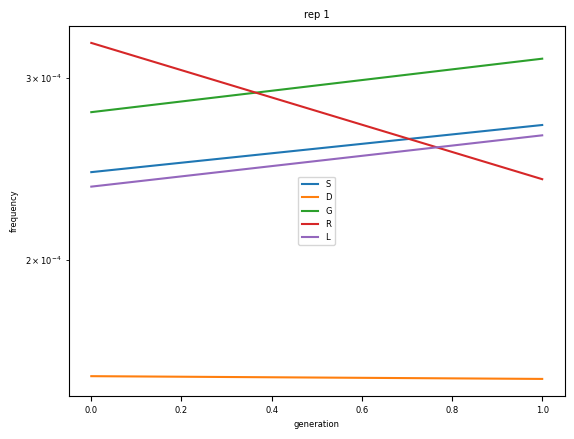

S 0.20150839167829854
D 0.6047543587484124
G -0.25111463258407407
R 0.2669113358540098
L 0.49777073483185186


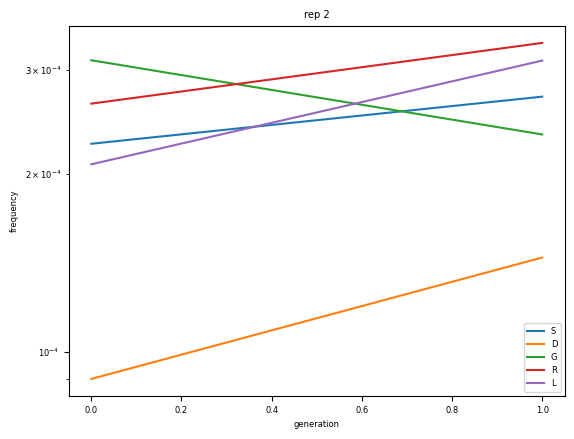

S 0.18111399029209183
D 0.39781697730646726
G 0.062166538888801894
R 0.10255160847372151
L -0.4460865124892787


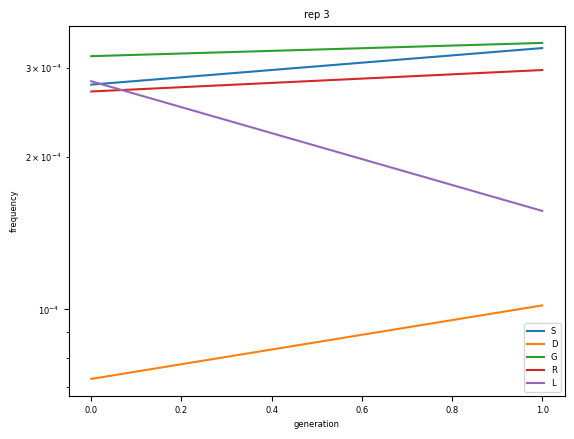

In [11]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')
site=359
AA_list=['S','D','G','R','L']

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in AA_list:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
    
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-2_codoncounts.csv')

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in AA_list:
# for aa in ['E','F','G','V']:
    aa_list = aa2codon[aa]
#     print(aa_list)

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('generation')
    plt.ylabel('frequency')
    plt.title('rep 2')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
    
plt.show()
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-3_codoncounts.csv')

# for aa in AA[1:]:
for aa in AA_list:
# for aa in ['M']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('generation')
    plt.ylabel('frequency')
    plt.title('rep 3')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()

S -0.5017581782134597
D -1.0
R -1.0


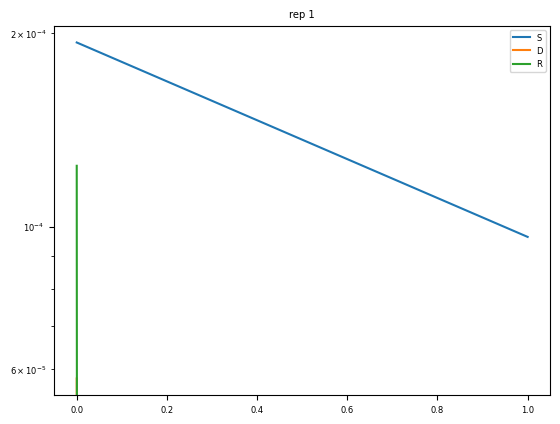

S -0.6075184213878518
D -1.0
R -1.0


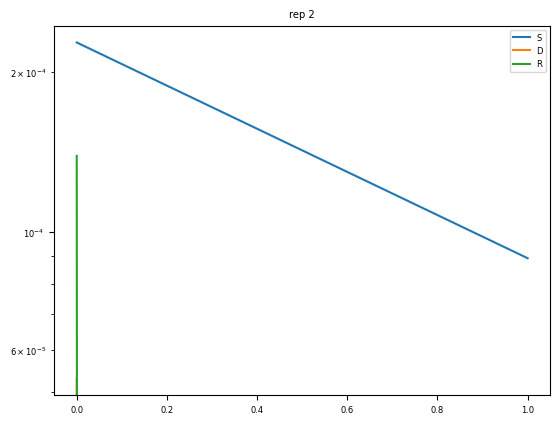

S -0.7272460432580485
D -1.0
R -1.0


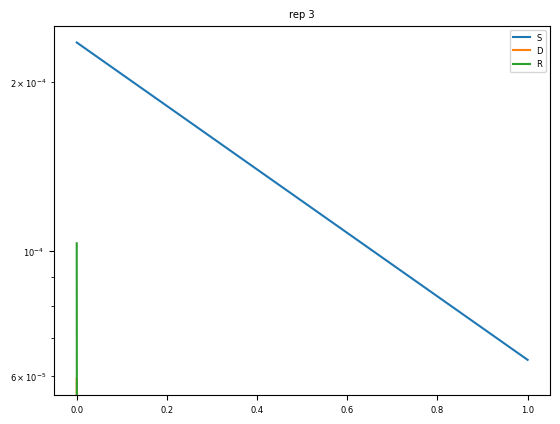

In [391]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-1_codoncounts.csv')
site=359

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in ['S','D','R']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
    
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-2_codoncounts.csv')
site=359

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in ['S','D','R']:
# for aa in ['E','F','G','V']:
    aa_list = aa2codon[aa]
#     print(aa_list)

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 2')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
    
plt.show()
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-3_codoncounts.csv')
site=359

# for aa in AA[1:]:
for aa in ['S','D','R']:
# for aa in ['M']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 3')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()

W -0.4819527359489936
E 0.0653391317177955
D -0.8612373399863376


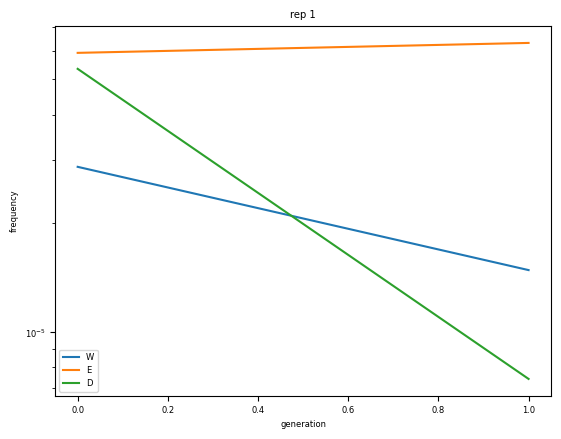

W 0.6964746676190955
E -0.0002917137244617131
D -0.7607535725152557


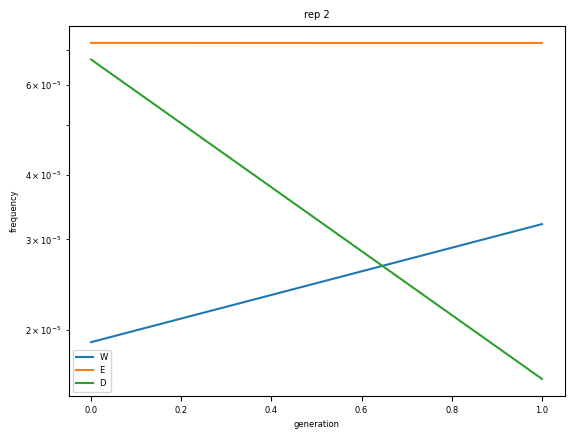

W 0.21191584510620992
E -0.3651869382776995
D -0.9164195968892269


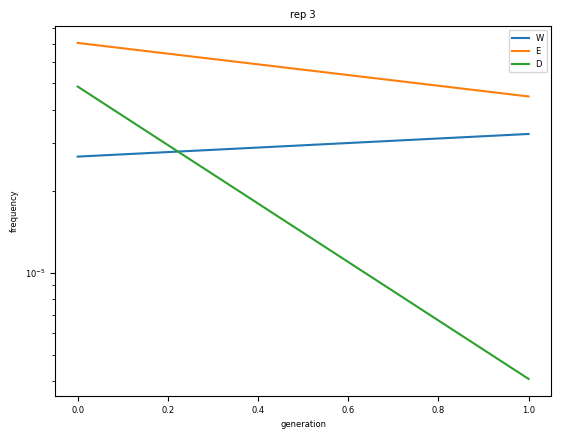

In [401]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')
site=614

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in ['W','E','D']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
#     print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    plt.xlabel('generation')
    plt.ylabel('frequency')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
    
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-2_codoncounts.csv')
site=614

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in ['W','E','D']:
# for aa in ['E','F','G','V']:
    aa_list = aa2codon[aa]
#     print(aa_list)

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('generation')
    plt.ylabel('frequency')
    plt.title('rep 2')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
    
plt.show()
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-3_codoncounts.csv')
site=614

# for aa in AA[1:]:
for aa in ['W','E','D']:
# for aa in ['M']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('generation')
    plt.ylabel('frequency')
    plt.title('rep 3')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()

In [398]:
count_0.iloc[355]

site        385
wildtype    ACA
AAA          52
AAC           8
AAG          11
           ... 
TGT           4
TTA           6
TTC           3
TTG           9
TTT           2
Name: 355, Length: 66, dtype: object

25 0
A -1.0
18 0
C -1.0
21 0
D -1.0
16 0
E -1.0
361121 311150
F 0.0016915843924651625
53 0
G -1.0
24 0
H -1.0
35 3
I -0.9003516356426919
14 0
K -1.0
200 67
L -0.6105409759701875
10 0
M -1.0
32 0
N -1.0
44 1
P -0.9735780852082895
8 0
Q -1.0
45 0
R -1.0
70 30
S -0.5017581782134597
30 0
T -1.0
62 6
V -0.8874937821772328
7 11
W 0.8268866798839815
15 10
Y -0.22495716610982608


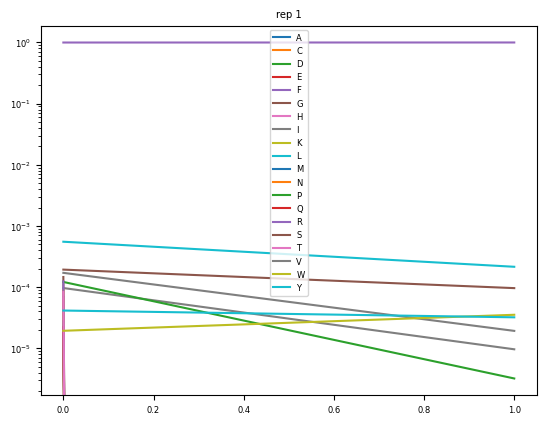

S -0.6075184213878518
D -1.0
R -1.0


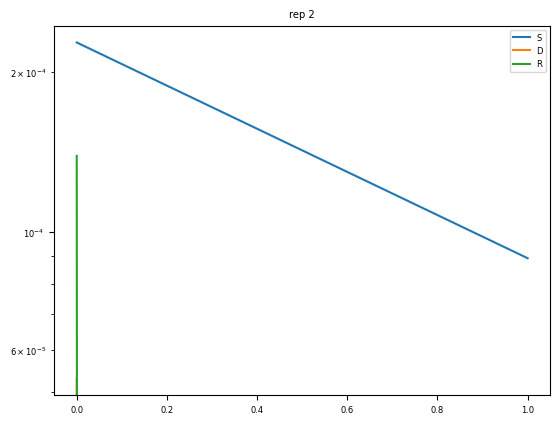

S -0.7272460432580485
D -1.0
R -1.0


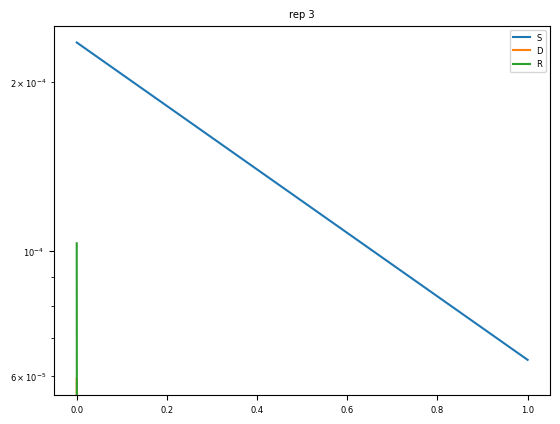

In [396]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-1_codoncounts.csv')
site=359

for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
# for aa in ['L','Q','R']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()
    
    print(gen0_c, gen1_c)

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 1')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()
    
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-2_codoncounts.csv')
site=359

# for aa in AA[1:]:
# for aa in ['A','I','L','M','R','W','Y']:
for aa in ['S','D','R']:
# for aa in ['E','F','G','V']:
    aa_list = aa2codon[aa]
#     print(aa_list)

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 2')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
    
plt.show()
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BG505/raw_data/mutvirus-3_codoncounts.csv')
site=359

# for aa in AA[1:]:
for aa in ['S','D','R']:
# for aa in ['M']:
    aa_list = aa2codon[aa]

    gen0_c = count_0[aa_list].iloc[site].sum()
    gen1_c = count_1[aa_list].iloc[site].sum()

    gen0_t = count_0.iloc[:,2:].T[site].sum()
    gen1_t = count_1.iloc[:,2:].T[site].sum()

    plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)
    plt.yscale('log')
    plt.legend()
    plt.title('rep 3')
    print(aa,(gen1_c/gen1_t-gen0_c/gen0_t)/(gen0_c/gen0_t))
plt.show()

In [392]:
full_table[(full_table['site']=='389')&(full_table['replicate']=='1')].sort_values('normalized_selection_coefficient_BG505')
# full_table[(full_table['site']=='644')&(full_table['replicate']=='1')].sort_values('rescaled_preference_BF520')


,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
7145,1,389,G,0.051651,0.036104,-0.036777,0.034278,0.059540,0.058349,-0.027568,0.031844
7156,1,389,T,0.008632,0.000785,-0.008211,0.045612,0.077465,0.122560,0.005668,0.052425
7147,1,389,I,0.010694,0.001242,-0.006305,0.046490,0.028595,0.007376,-0.009492,0.041762
7140,1,389,A,0.012990,0.001882,-0.006020,0.046623,0.067930,0.084623,0.005061,0.051950
7157,1,389,V,0.053749,0.039315,-0.004024,0.047563,0.047397,0.030669,-0.003550,0.045655
7158,1,389,W,0.017076,0.003380,-0.003758,0.047689,0.038554,0.017132,-0.002265,0.046544
7151,1,389,N,0.021154,0.005344,-0.003605,0.047762,0.028600,0.007379,-0.005634,0.044250
7144,1,389,F,0.040689,0.021669,-0.002558,0.048265,0.039978,0.018976,-0.006747,0.043517
7152,1,389,P,0.038022,0.018743,-0.002178,0.048449,0.047027,0.029998,-0.007564,0.042987
7150,1,389,M,0.042362,0.023621,-0.000640,0.049200,0.028284,0.007152,-0.003124,0.045948


In [394]:
full_table[(full_table['site']=='389')&(full_table['replicate']=='1')].sort_values('rescaled_preference_BG505')


,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
7156,1,389,T,0.008632,0.000785,-0.008211,0.045612,0.077465,0.122560,0.005668,0.052425
7147,1,389,I,0.010694,0.001242,-0.006305,0.046490,0.028595,0.007376,-0.009492,0.041762
7140,1,389,A,0.012990,0.001882,-0.006020,0.046623,0.067930,0.084623,0.005061,0.051950
7158,1,389,W,0.017076,0.003380,-0.003758,0.047689,0.038554,0.017132,-0.002265,0.046544
7155,1,389,S,0.019383,0.004432,0.022606,0.062075,0.073538,0.105834,0.039358,0.086898
7151,1,389,N,0.021154,0.005344,-0.003605,0.047762,0.028600,0.007379,-0.005634,0.044250
7152,1,389,P,0.038022,0.018743,-0.002178,0.048449,0.047027,0.029998,-0.007564,0.042987
7142,1,389,D,0.038925,0.019708,0.020714,0.060912,0.038582,0.017166,0.041598,0.089867
7144,1,389,F,0.040689,0.021669,-0.002558,0.048265,0.039978,0.018976,-0.006747,0.043517
7150,1,389,M,0.042362,0.023621,-0.000640,0.049200,0.028284,0.007152,-0.003124,0.045948


In [376]:
full_table[(full_table['site']=='644')&(full_table['replicate']=='Average/Joint')].sort_values('rescaled_preference_BF520')


,replicate,site,amino_acid,preference_BG505,rescaled_preference_BG505,selection_coefficient_BG505,normalized_selection_coefficient_BG505,preference_BF520,rescaled_preference_BF520,selection_coefficient_BF520,normalized_selection_coefficient_BF520
52432,Average/Joint,644,P,0.024592,0.009680,-0.034714,0.029917,0.012273,0.000793,-0.027238,0.030015
52427,Average/Joint,644,I,0.033418,0.018660,-0.019314,0.034898,0.030879,0.010695,0.060685,0.112228
52431,Average/Joint,644,N,0.044810,0.034957,-0.006219,0.039781,0.032453,0.012304,0.047471,0.092049
52439,Average/Joint,644,Y,0.044566,0.034550,-0.009225,0.038603,0.041529,0.024666,-0.010264,0.038718
52437,Average/Joint,644,V,0.034775,0.020319,-0.031554,0.030878,0.044021,0.029070,-0.012498,0.037442
52433,Average/Joint,644,Q,0.041246,0.029276,-0.007661,0.039211,0.044657,0.030271,-0.005777,0.041413
52420,Average/Joint,644,A,0.067502,0.084009,0.017538,0.050448,0.044986,0.030904,0.022998,0.063767
52428,Average/Joint,644,K,0.043006,0.032015,-0.003531,0.040865,0.045917,0.032741,-0.001617,0.044080
52435,Average/Joint,644,S,0.051284,0.046660,-0.008581,0.038852,0.049443,0.040337,0.022771,0.063550
52426,Average/Joint,644,H,0.041711,0.029986,-0.008894,0.038731,0.051571,0.045428,0.001337,0.046077


In [49]:
aa2codon = {                                                         # DNA codon table
    'A' : ['GCT', 'GCC', 'GCA', 'GCG'],
    'R' : ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'N' : ['AAT', 'AAC'],
    'D' : ['GAT', 'GAC'],
    'C' : ['TGT', 'TGC'],
    'E' : ['GAA', 'GAG'],
    'Q' : ['CAA', 'CAG'],
    'G' : ['GGT', 'GGC', 'GGA', 'GGG'],
    'H' : ['CAT', 'CAC'],
    'I' : ['ATT', 'ATC', 'ATA'],
    'L' : ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    'K' : ['AAA', 'AAG'],
    'M' : ['ATG'],
    'F' : ['TTT', 'TTC'],
    'P' : ['CCT', 'CCC', 'CCA', 'CCG'],
    'S' : ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'T' : ['ACT', 'ACC', 'ACA', 'ACG'],
    'W' : ['TGG'],
    'Y' : ['TAT', 'TAC'],
    'V' : ['GTT', 'GTC', 'GTA', 'GTG'],
    '*' : ['TAA', 'TGA', 'TAG'],
    '-' : ['---'],
    } 

In [206]:
AA

['*',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

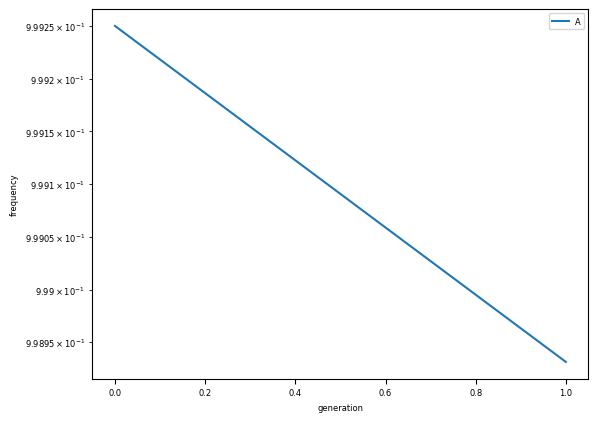

In [285]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-1_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-1_codoncounts.csv')


site=0
aa='A'
aa_list = aa2codon[aa]

gen0_c = count_0[aa_list].iloc[site].sum()
gen1_c = count_1[aa_list].iloc[site].sum()

gen0_t = count_0.iloc[:,2:].T[site].sum()
gen1_t = count_1.iloc[:,2:].T[site].sum()

plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)

# site=0
# aa='T'
# aa_list = aa2codon[aa]

# gen0_c = count_0[aa_list].iloc[site].sum()
# gen1_c = count_1[aa_list].iloc[site].sum()

# gen0_t = count_0.iloc[:,2:].T[site].sum()
# gen1_t = count_1.iloc[:,2:].T[site].sum()

# plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)

plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.legend()

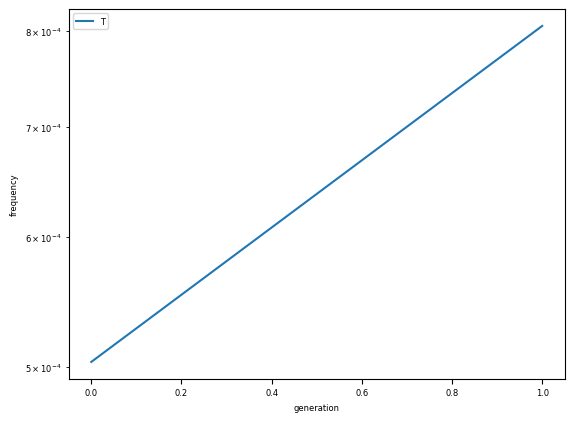

In [288]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-2_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-2_codoncounts.csv')


# site=0
# aa='A'
# aa_list = aa2codon[aa]

# gen0_c = count_0[aa_list].iloc[site].sum()
# gen1_c = count_1[aa_list].iloc[site].sum()

# gen0_t = count_0.iloc[:,2:].T[site].sum()
# gen1_t = count_1.iloc[:,2:].T[site].sum()

# plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)

site=0
aa='T'
aa_list = aa2codon[aa]

gen0_c = count_0[aa_list].iloc[site].sum()
gen1_c = count_1[aa_list].iloc[site].sum()

gen0_t = count_0.iloc[:,2:].T[site].sum()
gen1_t = count_1.iloc[:,2:].T[site].sum()

plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)

plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.legend()

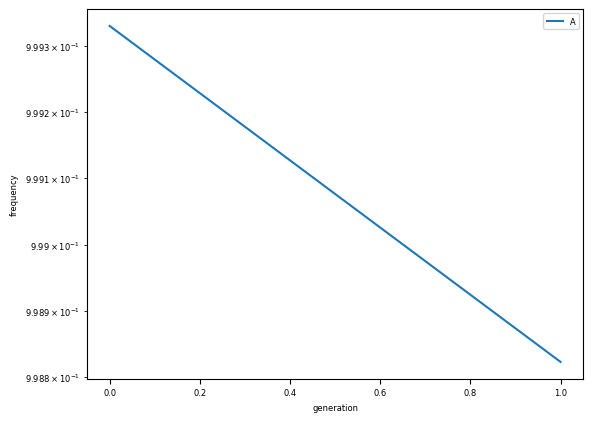

In [297]:
count_0 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutDNA-3_codoncounts.csv')
count_1 = pd.read_csv('./data/virus_protein/HIVEnv/BF520/raw_data/mutvirus-3_codoncounts.csv')


site=0
aa='A'
aa_list = aa2codon[aa]

gen0_c = count_0[aa_list].iloc[site].sum()
gen1_c = count_1[aa_list].iloc[site].sum()

gen0_t = count_0.iloc[:,2:].T[site].sum()
gen1_t = count_1.iloc[:,2:].T[site].sum()

plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)

# site=0
# aa='T'
# aa_list = aa2codon[aa]

# gen0_c = count_0[aa_list].iloc[site].sum()
# gen1_c = count_1[aa_list].iloc[site].sum()

# gen0_t = count_0.iloc[:,2:].T[site].sum()
# gen1_t = count_1.iloc[:,2:].T[site].sum()

# plt.plot([0,1], [gen0_c/gen0_t, gen1_c/gen1_t], label=aa)

plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('frequency')
plt.legend()

In [294]:
count_1[count_1['site']==644]

,site,wildtype,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
614,644,AAA,372978,4,30,12,5,2,4,16,20,4,4,5,45,12,26,44,6,6,4,19,2,0,0,1,10,8,7,9,5,8,27,11,20,0,7,6,9,2,7,7,4,1,2,3,2,5,23,30,4,10,4,12,6,3,3,1,0,5,12,14,63,1,27,27
